In [362]:
# Importing all necessary libraries

import numpy as np 
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns
from scipy import stats

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [363]:
# Importing the data file
housingprice = pd.read_csv("train.csv",encoding='ANSI')

In [364]:
# Glancing the top 5 rows and available columns in the data set
housingprice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [365]:
# Summary of the dataset
housingprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [366]:
# Let's look at the number of rows and columns in the dataset
housingprice.shape

(1460, 81)

In [367]:
# Getting insights of the features
housingprice.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [368]:
# Calculating the Age from the year provided in the data

housingprice['AgeYearBuilt'] = housingprice.YearBuilt.max() - housingprice['YearBuilt']
housingprice['AgeYearRemodAdd'] = housingprice.YearRemodAdd.max() - housingprice['YearRemodAdd']
housingprice['AgeGarageYrBlt'] = housingprice.GarageYrBlt.max() - housingprice['GarageYrBlt']
housingprice['AgeYrSold'] = housingprice.YrSold.max() - housingprice['YrSold']
housingprice.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

In [369]:
# looking the data frame of calculated age columns
housingprice[['AgeYearBuilt', 'AgeYearRemodAdd', 'AgeGarageYrBlt', 'AgeYrSold']].head()

,AgeYearBuilt,AgeYearRemodAdd,AgeGarageYrBlt,AgeYrSold
0,7,7,7.0,2
1,34,34,34.0,3
2,9,8,9.0,2
3,95,40,12.0,4
4,10,10,10.0,2


In [370]:
# Checking the percentange of null values in the columns
round(100*(housingprice.isnull().sum()/len(housingprice.index)), 2)[round(housingprice.isnull().sum()/len(housingprice.index), 2).values > 0.00].sort_values(ascending=False)

PoolQC            99.52
MiscFeature       96.30
Alley             93.77
Fence             80.75
FireplaceQu       47.26
LotFrontage       17.74
GarageType         5.55
GarageFinish       5.55
GarageQual         5.55
GarageCond         5.55
AgeGarageYrBlt     5.55
BsmtExposure       2.60
BsmtFinType2       2.60
BsmtFinType1       2.53
BsmtCond           2.53
BsmtQual           2.53
MasVnrArea         0.55
MasVnrType         0.55
dtype: float64

In [371]:
housingprice.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','Id'],axis=1,inplace=True)

In [372]:
# Rechecking the percentange of null values in the columns
round(100*(housingprice.isnull().sum()/len(housingprice.index)), 2)[round(housingprice.isnull().sum()/len(housingprice.index), 2).values > 0.00].sort_values(ascending=False)

LotFrontage       17.74
GarageType         5.55
GarageFinish       5.55
GarageQual         5.55
GarageCond         5.55
AgeGarageYrBlt     5.55
BsmtExposure       2.60
BsmtFinType2       2.60
BsmtQual           2.53
BsmtCond           2.53
BsmtFinType1       2.53
MasVnrType         0.55
MasVnrArea         0.55
dtype: float64

In [373]:
out_col = [
    'LotArea',
    'TotalBsmtSF',
    'PoolArea',
    'MiscVal']

In [374]:
# method to remove outliers
def remove_outliers(x, num_cols, s_quntl=0.05, e_quntl=0.95):
    for col in num_cols:
        Q1 = x[col].quantile(s_quntl)
        Q3 = x[col].quantile(e_quntl)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

In [375]:
# Removing the outliers from the data set
housingprice=remove_outliers(housingprice, out_col)

In [376]:
# Let's look at the number of rows and columns in the dataset
housingprice.shape

(1390, 75)

In [377]:
# To replace the null value with the selected values
def filling_missing_values(col, replace_type:str, other_value=None):
    if replace_type == 'mean':
        housingprice[col].fillna(housingprice[col].mean(), inplace=True)  
    if replace_type == 'mode':
        housingprice[col].fillna(housingprice[col].mode()[0], inplace=True)
    if replace_type == 'median':
        housingprice[col].fillna(housingprice[col].median(), inplace=True)
    if replace_type == 'other':
        housingprice[col].fillna(other_value, inplace=True)

In [378]:
null_cols = housingprice.columns[round(housingprice.isnull().sum()/len(housingprice.index), 2).values > 0.00]
null_cols

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'AgeGarageYrBlt'],
      dtype='object')

In [379]:
housingprice[null_cols].describe(percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,LotFrontage,MasVnrArea,AgeGarageYrBlt
count,1151.000000,1382.000000,1312.000000
mean,69.527368,104.463097,31.167683
std,23.064916,180.816155,24.746420
min,21.000000,0.000000,0.000000
5%,34.000000,0.000000,3.000000
10%,43.000000,0.000000,4.000000
25%,59.000000,0.000000,8.000000
50%,69.000000,0.000000,30.000000
75%,80.000000,167.750000,48.000000
90%,95.000000,334.800000,65.000000


In [380]:
for col in null_cols:
    if col not in ['LotFrontage', 'AgeGarageYrBlt', 'MasVnrArea']:
        filling_missing_values(col, 'mode')  
filling_missing_values('LotFrontage', 'mean') 
filling_missing_values('MasVnrArea', 'mean') 
filling_missing_values('AgeGarageYrBlt', 'other', other_value=0)

In [381]:
round(100*(housingprice.isnull().sum()/len(housingprice.index)), 2)[round(housingprice.isnull().sum()/len(housingprice.index), 2).values > 0.00].sort_values(ascending=False)

Series([], dtype: float64)

In [382]:
# Checking the Numerical columns
num_cols=housingprice.select_dtypes(include=['int64', 'float']).columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'SalePrice', 'AgeYearBuilt', 'AgeYearRemodAdd',
       'AgeGarageYrBlt', 'AgeYrSold'],
      dtype='object')

In [383]:
def percentage_of_duplicate(num_cols):
    x=list()
    for col in (num_cols):
        if(housingprice[col].value_counts().max()/housingprice.shape[0] >= 0.90):
            x.append(col)
    return x

In [384]:
filter_cols=percentage_of_duplicate(num_cols)
print(filter_cols)
housingprice.drop(filter_cols, axis = 1, inplace = True)

['LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


## Data Visualization

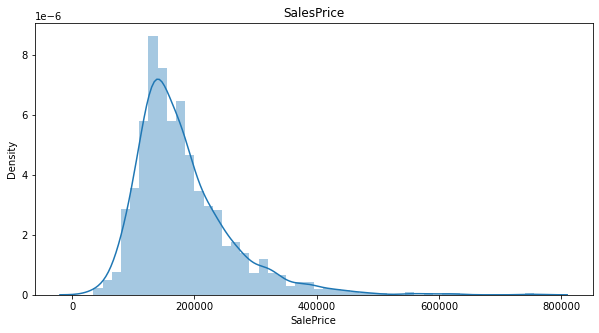

In [385]:
# Plotting the Sales Price column to see the distribution
plt.figure(figsize=(10,5))
plt.title('SalesPrice')
sns.distplot(housingprice['SalePrice'])
plt.show()

In [386]:
# As the sales price data was skewed log transformation is done for better results.
housingprice['SalePricelog']=np.log(housingprice['SalePrice'])

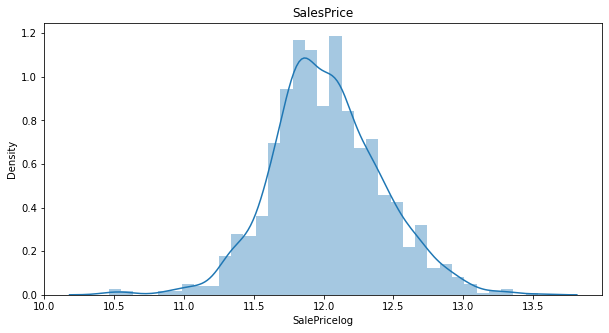

In [387]:
# Plotting the Sales Price column to see the distribution after transformation
plt.figure(figsize=(10,5))
plt.title('SalesPrice')
sns.distplot(housingprice['SalePricelog'])
plt.show()

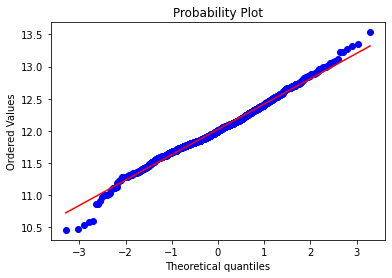

In [388]:
# Plot to see the linearity of the transformed data
stats.probplot(housingprice['SalePricelog'], plot=plt)
plt.show()

In [389]:
def categorical_data(cols):
    for col in cols:
        print('\n')
        print('                                             ',col,'                                      ')
        print(housingprice[col].astype('category').value_counts())
        f, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(12,3), dpi=90) 
        sns.countplot(data=housingprice, x=col, order=housingprice[col].value_counts().index, ax=ax1) 
        
        if col == 'Neighborhood':
            xticks(rotation = 90)
        plt.show()



                                              MSZoning                                       
RL         1090
RM          211
FV           65
RH           16
C (all)       8
Name: MSZoning, dtype: int64


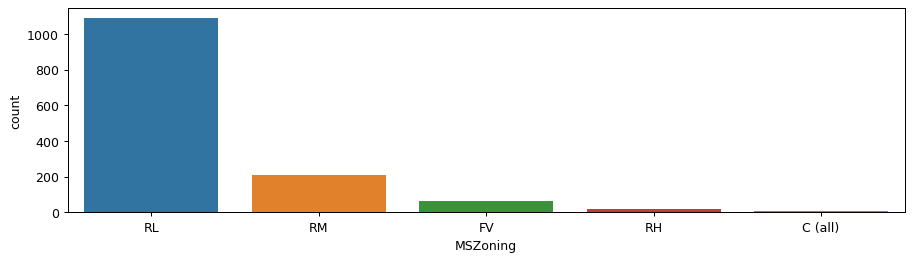



                                              Street                                       
Pave    1387
Grvl       3
Name: Street, dtype: int64


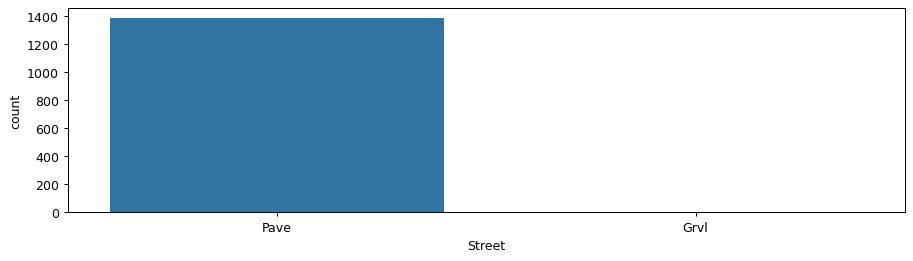



                                              LotShape                                       
Reg    892
IR1    456
IR2     34
IR3      8
Name: LotShape, dtype: int64


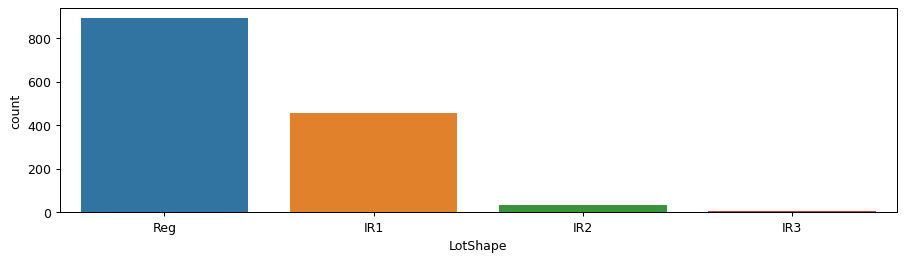



                                              LandContour                                       
Lvl    1258
Bnk      58
HLS      47
Low      27
Name: LandContour, dtype: int64


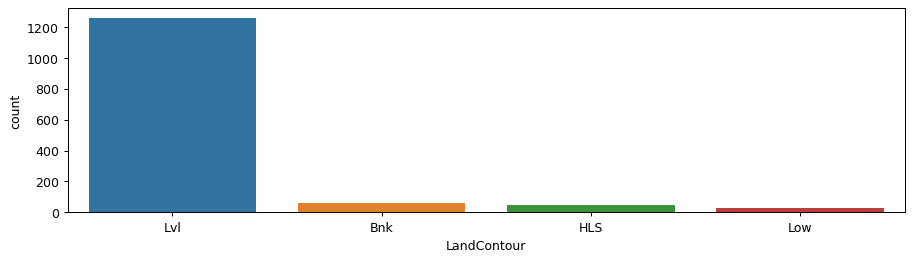



                                              Utilities                                       
AllPub    1389
NoSeWa       1
Name: Utilities, dtype: int64


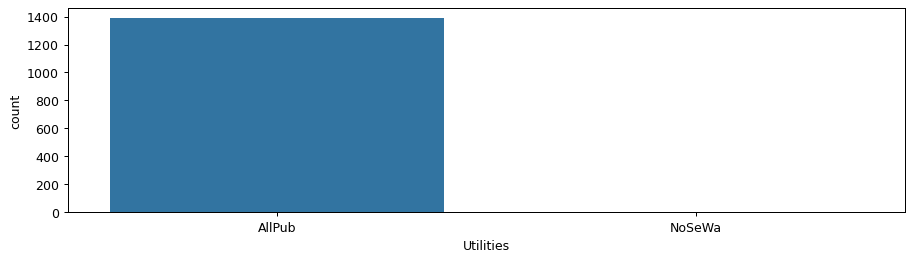



                                              LotConfig                                       
Inside     1009
Corner      247
CulDSac      85
FR2          45
FR3           4
Name: LotConfig, dtype: int64


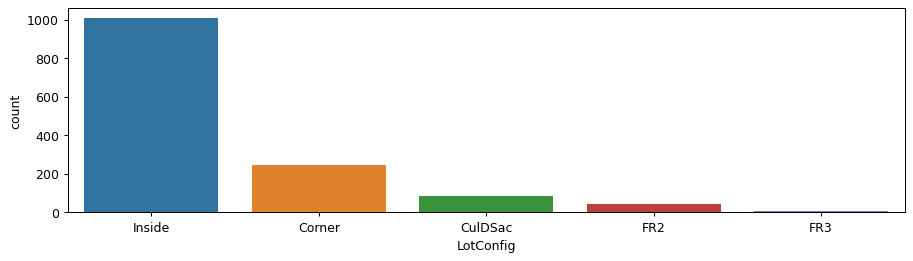



                                              LandSlope                                       
Gtl    1325
Mod      58
Sev       7
Name: LandSlope, dtype: int64


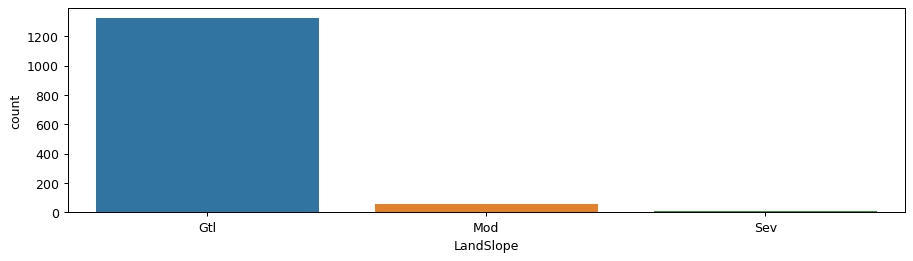



                                              Neighborhood                                       
NAmes      211
CollgCr    148
OldTown    108
Edwards     94
Somerst     86
NridgHt     77
Gilbert     76
Sawyer      69
NWAmes      67
SawyerW     58
BrkSide     54
Crawfor     50
Mitchel     44
NoRidge     39
Timber      35
IDOTRR      34
SWISU       25
StoneBr     24
ClearCr     20
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     10
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


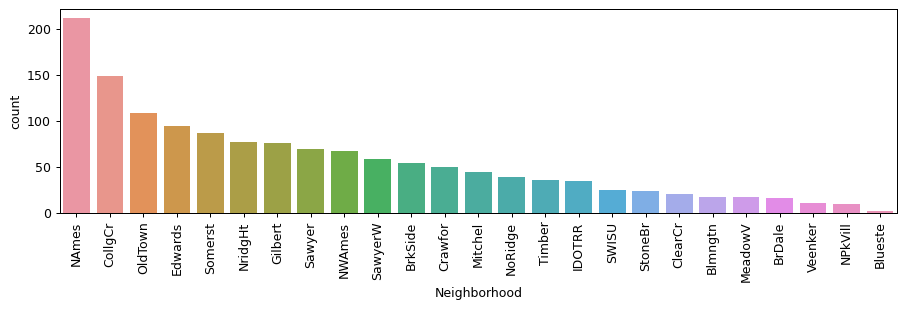



                                              Condition1                                       
Norm      1204
Feedr       74
Artery      45
RRAn        24
PosN        17
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


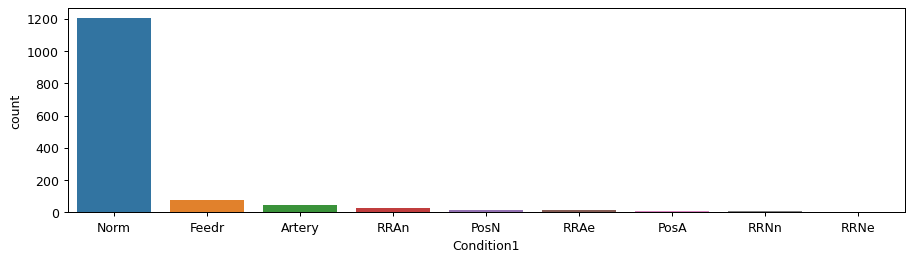



                                              Condition2                                       
Norm      1378
Feedr        5
Artery       2
RRNn         2
PosA         1
PosN         1
RRAn         1
Name: Condition2, dtype: int64


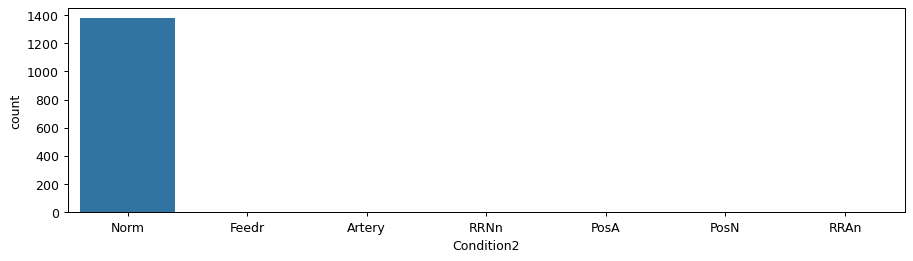



                                              BldgType                                       
1Fam      1155
TwnhsE     114
Duplex      49
Twnhs       43
2fmCon      29
Name: BldgType, dtype: int64


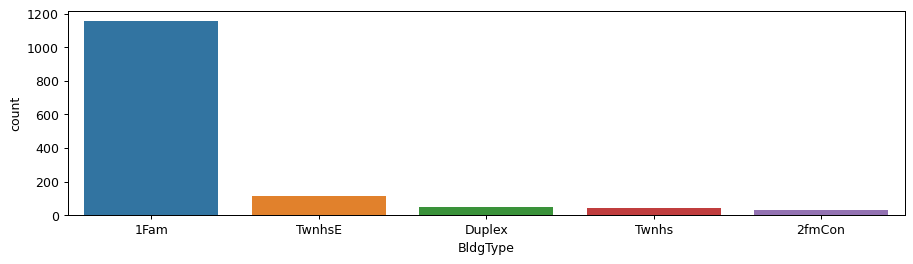



                                              HouseStyle                                       
1Story    692
2Story    427
1.5Fin    142
SLvl       61
SFoyer     35
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


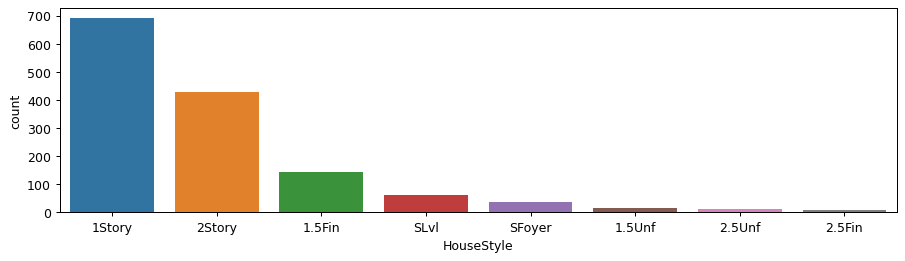



                                              RoofStyle                                       
Gable      1093
Hip         269
Gambrel      11
Flat         10
Mansard       6
Shed          1
Name: RoofStyle, dtype: int64


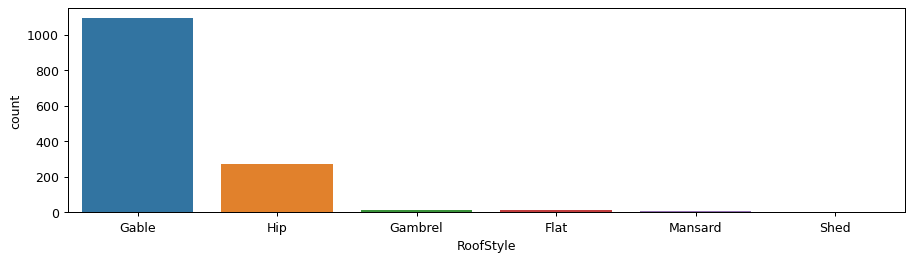



                                              RoofMatl                                       
CompShg    1370
Tar&Grv       9
WdShake       5
WdShngl       4
Metal         1
Roll          1
Name: RoofMatl, dtype: int64


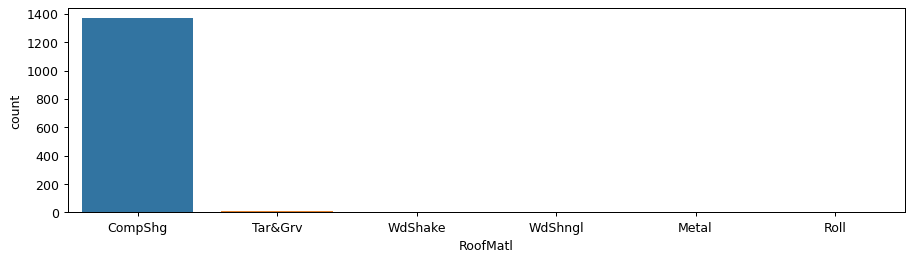



                                              Exterior1st                                       
VinylSd    505
HdBoard    209
MetalSd    208
Wd Sdng    190
Plywood     97
CemntBd     58
BrkFace     48
WdShing     25
Stucco      23
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64


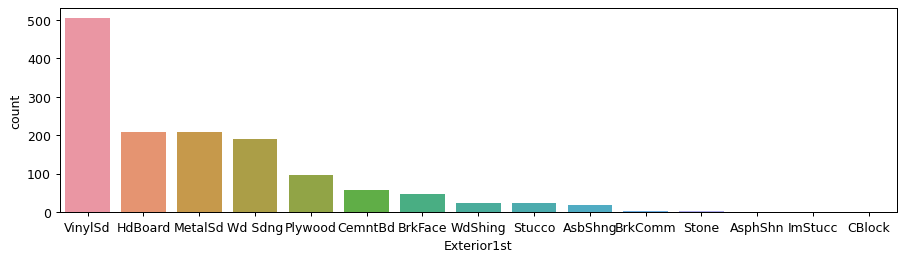



                                              Exterior2nd                                       
VinylSd    495
MetalSd    202
HdBoard    194
Wd Sdng    183
Plywood    129
CmentBd     58
Wd Shng     35
BrkFace     24
Stucco      24
AsbShng     20
ImStucc      9
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64


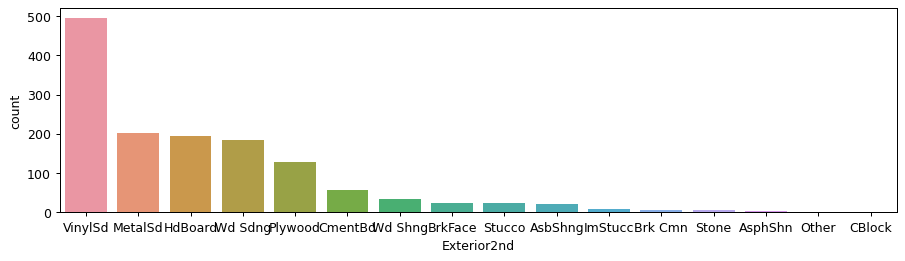



                                              MasVnrType                                       
None       822
BrkFace    431
Stone      124
BrkCmn      13
Name: MasVnrType, dtype: int64


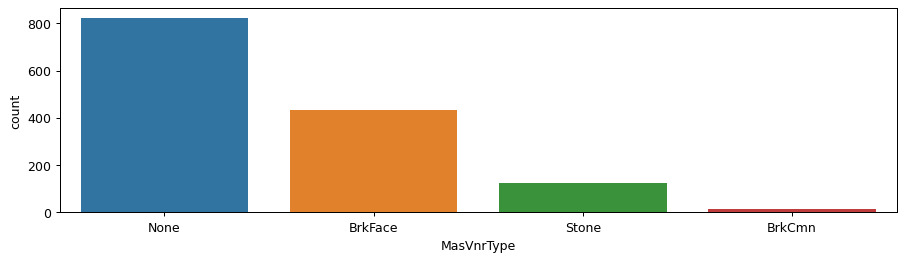



                                              ExterQual                                       
TA    857
Gd    475
Ex     47
Fa     11
Name: ExterQual, dtype: int64


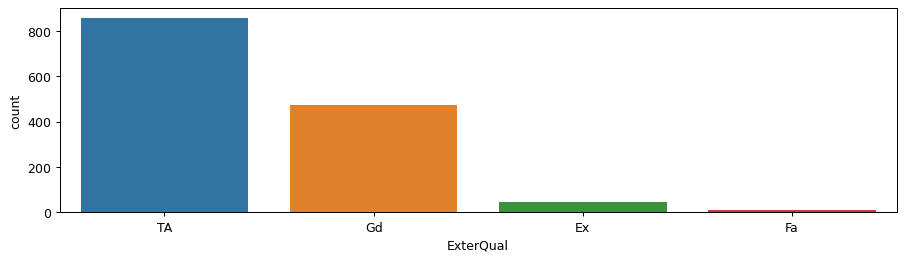



                                              ExterCond                                       
TA    1222
Gd     138
Fa      27
Ex       3
Name: ExterCond, dtype: int64


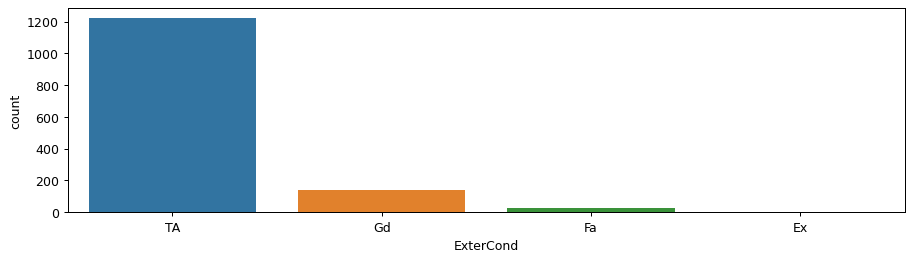



                                              Foundation                                       
PConc     632
CBlock    591
BrkTil    139
Slab       21
Stone       5
Wood        2
Name: Foundation, dtype: int64


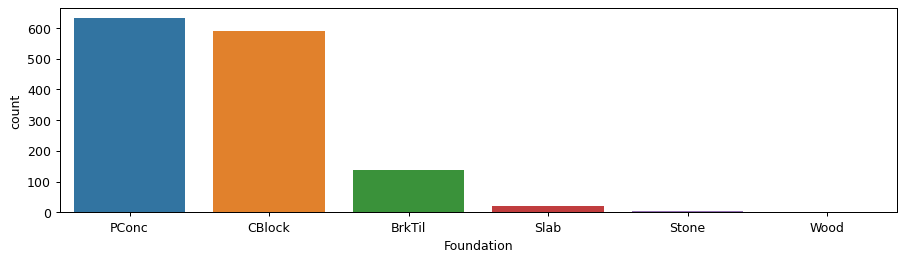



                                              BsmtQual                                       
TA    649
Gd    592
Ex    117
Fa     32
Name: BsmtQual, dtype: int64


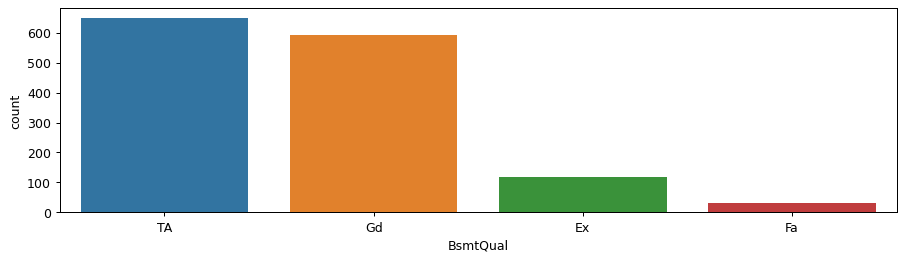



                                              BsmtCond                                       
TA    1282
Gd      62
Fa      44
Po       2
Name: BsmtCond, dtype: int64


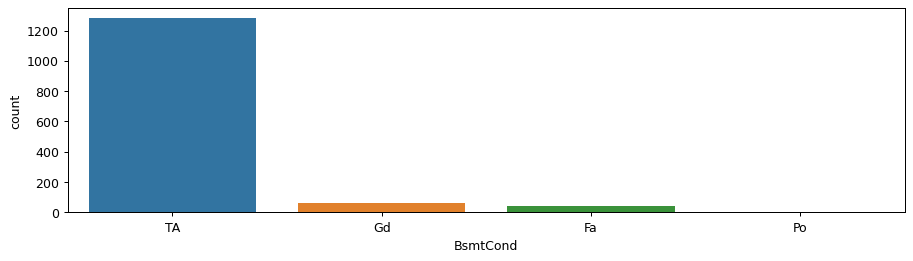



                                              BsmtExposure                                       
No    949
Av    211
Gd    122
Mn    108
Name: BsmtExposure, dtype: int64


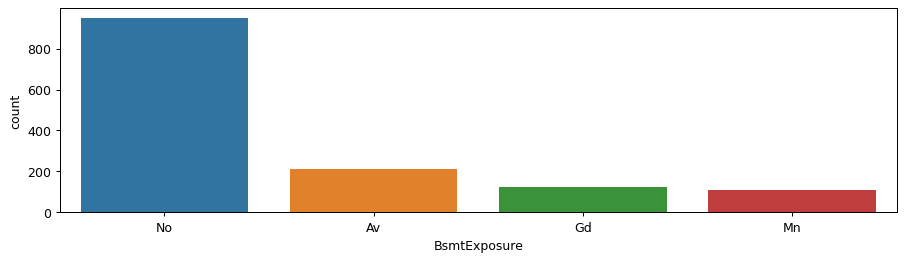



                                              BsmtFinType1                                       
Unf    450
GLQ    402
ALQ    199
BLQ    139
Rec    129
LwQ     71
Name: BsmtFinType1, dtype: int64


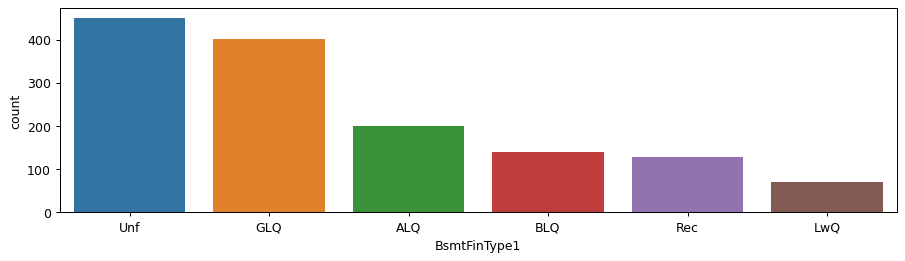



                                              BsmtFinType2                                       
Unf    1239
Rec      49
LwQ      41
BLQ      30
ALQ      19
GLQ      12
Name: BsmtFinType2, dtype: int64


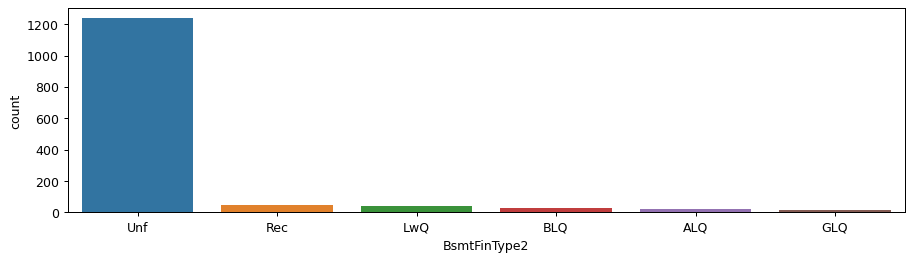



                                              Heating                                       
GasA     1360
GasW       16
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


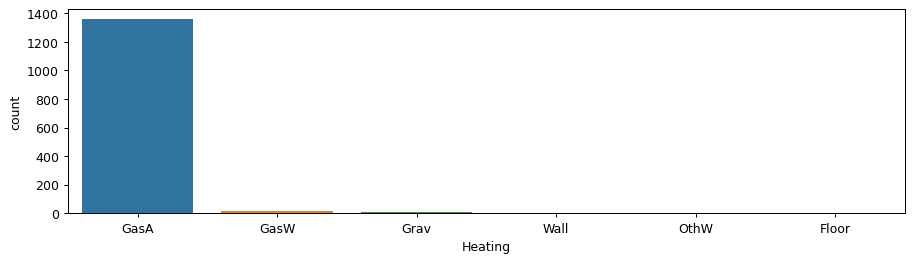



                                              HeatingQC                                       
Ex    712
TA    403
Gd    230
Fa     44
Po      1
Name: HeatingQC, dtype: int64


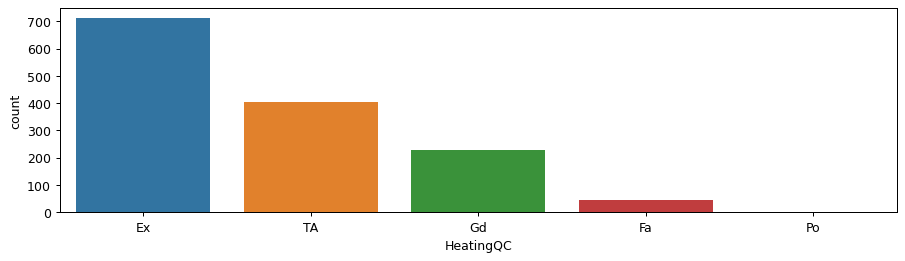



                                              CentralAir                                       
Y    1299
N      91
Name: CentralAir, dtype: int64


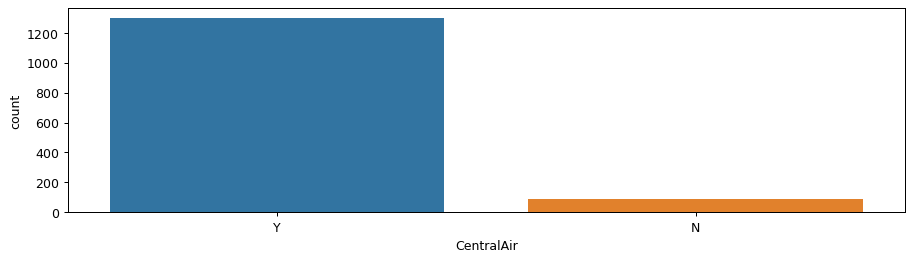



                                              Electrical                                       
SBrkr    1266
FuseA      92
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


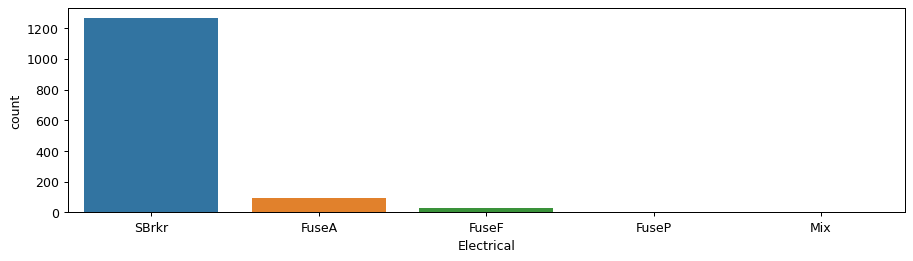



                                              KitchenQual                                       
TA    694
Gd    565
Ex     96
Fa     35
Name: KitchenQual, dtype: int64


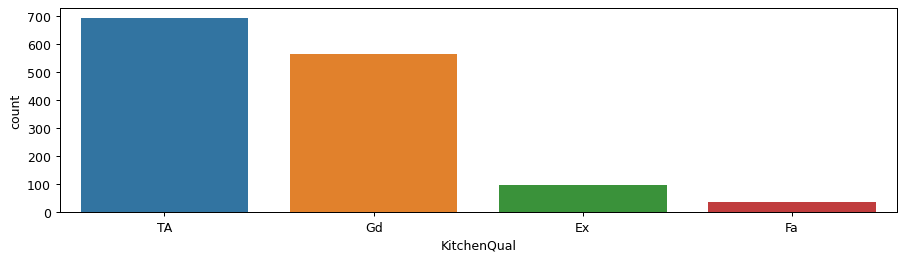



                                              Functional                                       
Typ     1304
Min2      32
Min1      25
Maj1      14
Mod        9
Maj2       5
Sev        1
Name: Functional, dtype: int64


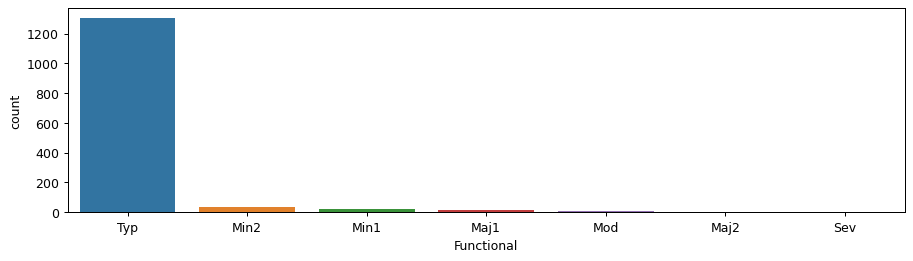



                                              GarageType                                       
Attchd     907
Detchd     370
BuiltIn     83
Basment     17
CarPort      7
2Types       6
Name: GarageType, dtype: int64


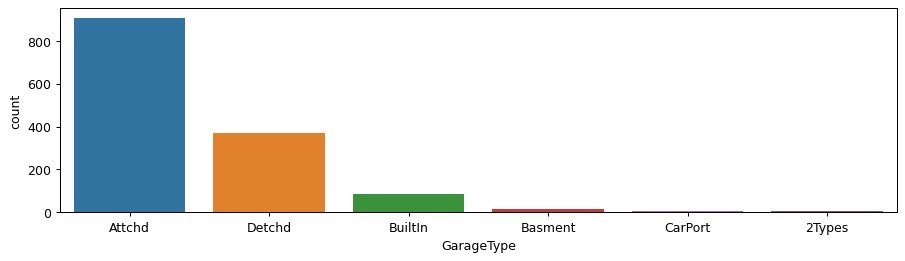



                                              GarageFinish                                       
Unf    654
RFn    400
Fin    336
Name: GarageFinish, dtype: int64


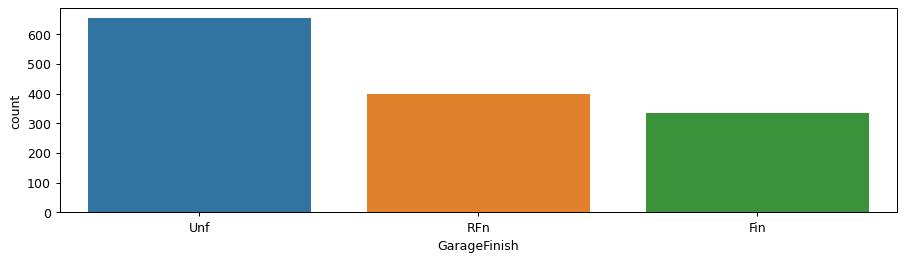



                                              GarageQual                                       
TA    1329
Fa      43
Gd      13
Po       3
Ex       2
Name: GarageQual, dtype: int64


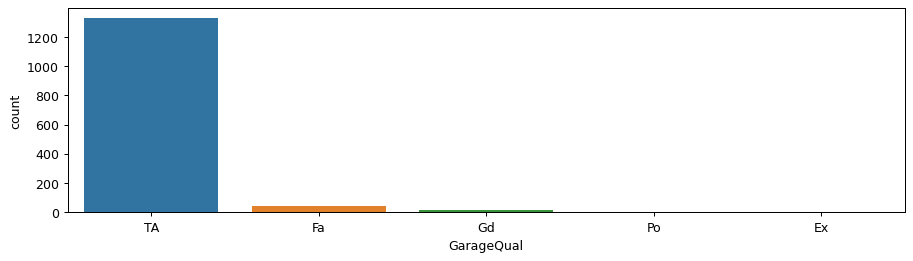



                                              GarageCond                                       
TA    1341
Fa      33
Gd       8
Po       7
Ex       1
Name: GarageCond, dtype: int64


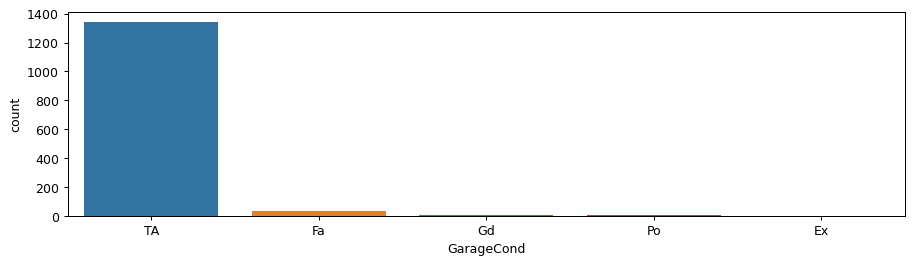



                                              PavedDrive                                       
Y    1276
N      85
P      29
Name: PavedDrive, dtype: int64


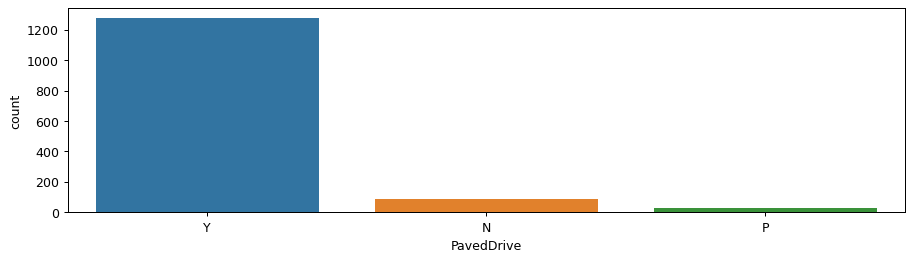



                                              SaleType                                       
WD       1203
New       120
COD        41
ConLD       8
ConLw       5
CWD         4
ConLI       4
Oth         3
Con         2
Name: SaleType, dtype: int64


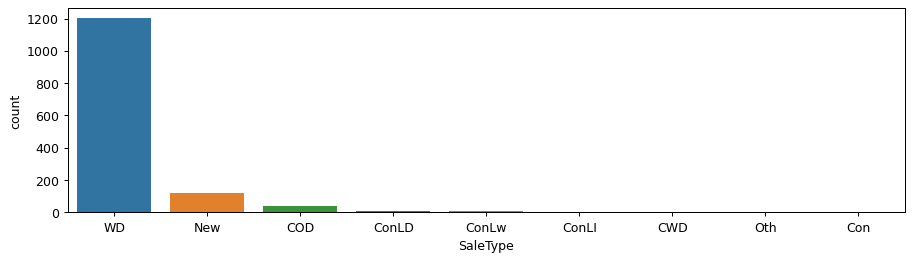



                                              SaleCondition                                       
Normal     1136
Partial     123
Abnorml      97
Family       20
Alloca       10
AdjLand       4
Name: SaleCondition, dtype: int64


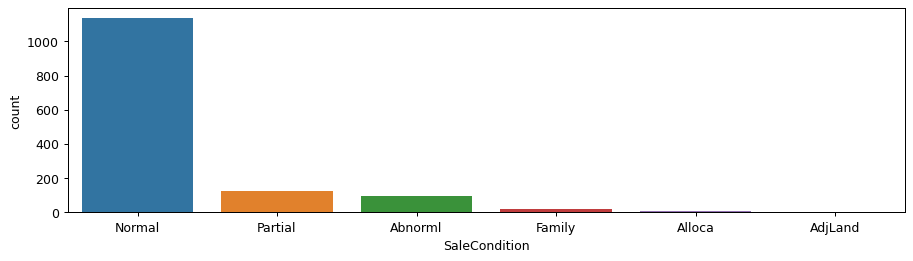

In [390]:
# Plotting the Categorical columns
categ_var = housingprice.select_dtypes(include=['object']).columns

categorical_data(categ_var)

In [391]:
def categorical_datab(cols):
    for col in cols:
        print('\n')
        print('                                             ',col,'                                      ')
        print(housingprice[col].astype('category').value_counts())
        f, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(12,3), dpi=90) 
        sns.boxplot(data=housingprice, x=col, y=housingprice['SalePricelog'], ax=ax1) 
        
        if col == 'Neighborhood':
            xticks(rotation = 90)
        plt.show()



                                              MSZoning                                       
RL         1090
RM          211
FV           65
RH           16
C (all)       8
Name: MSZoning, dtype: int64


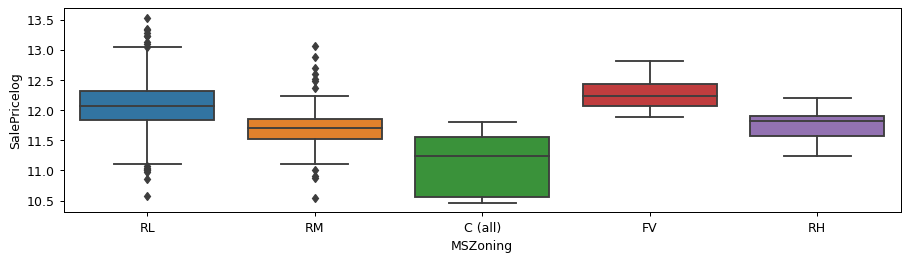



                                              Street                                       
Pave    1387
Grvl       3
Name: Street, dtype: int64


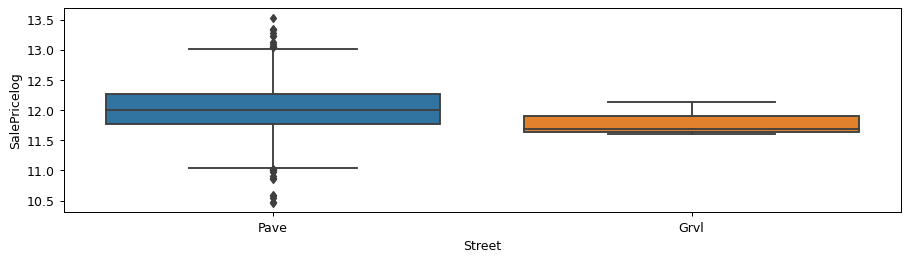



                                              LotShape                                       
Reg    892
IR1    456
IR2     34
IR3      8
Name: LotShape, dtype: int64


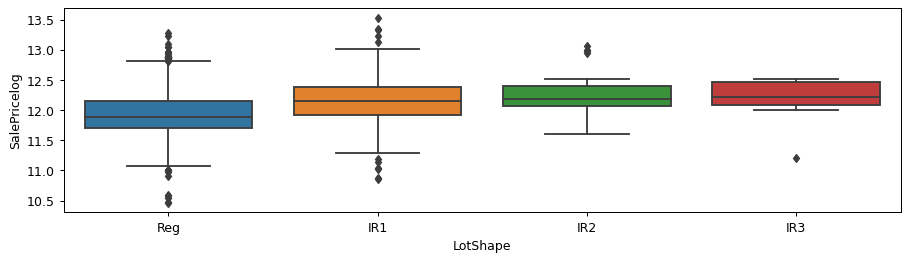



                                              LandContour                                       
Lvl    1258
Bnk      58
HLS      47
Low      27
Name: LandContour, dtype: int64


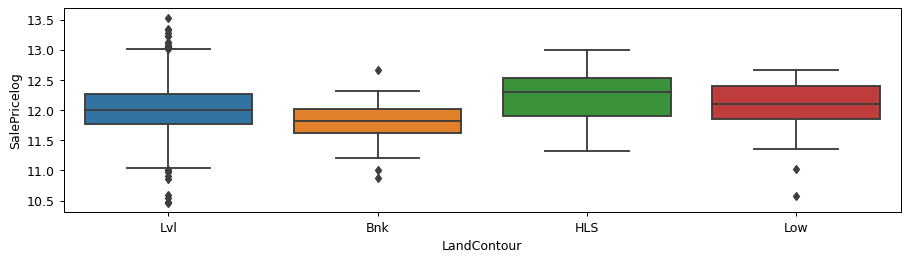



                                              Utilities                                       
AllPub    1389
NoSeWa       1
Name: Utilities, dtype: int64


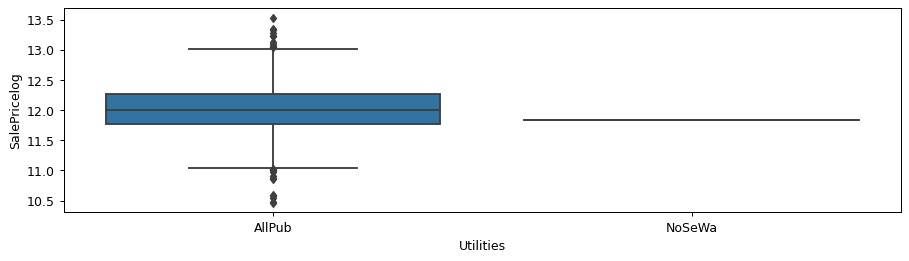



                                              LotConfig                                       
Inside     1009
Corner      247
CulDSac      85
FR2          45
FR3           4
Name: LotConfig, dtype: int64


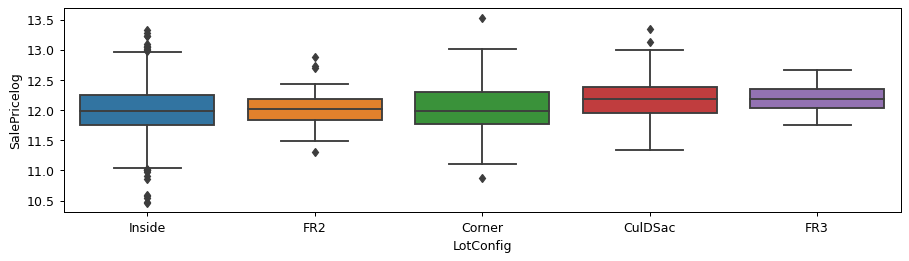



                                              LandSlope                                       
Gtl    1325
Mod      58
Sev       7
Name: LandSlope, dtype: int64


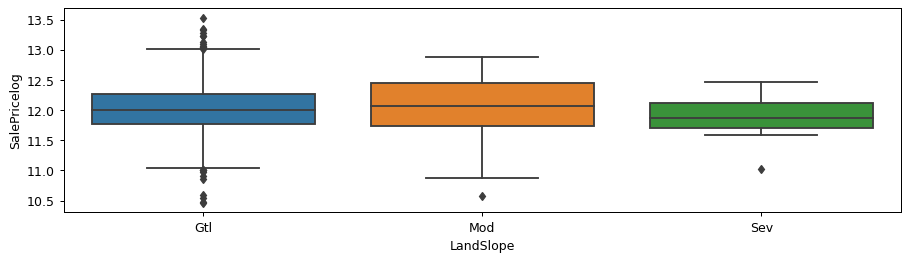



                                              Neighborhood                                       
NAmes      211
CollgCr    148
OldTown    108
Edwards     94
Somerst     86
NridgHt     77
Gilbert     76
Sawyer      69
NWAmes      67
SawyerW     58
BrkSide     54
Crawfor     50
Mitchel     44
NoRidge     39
Timber      35
IDOTRR      34
SWISU       25
StoneBr     24
ClearCr     20
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     10
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


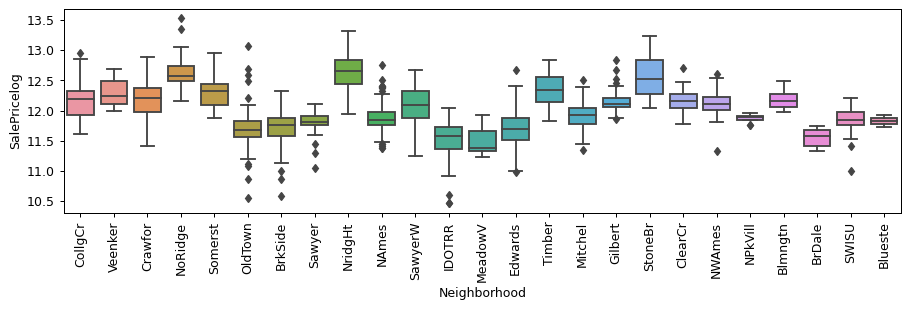



                                              Condition1                                       
Norm      1204
Feedr       74
Artery      45
RRAn        24
PosN        17
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


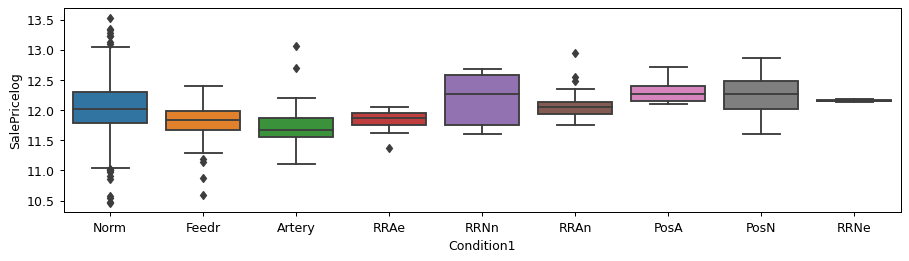



                                              Condition2                                       
Norm      1378
Feedr        5
Artery       2
RRNn         2
PosA         1
PosN         1
RRAn         1
Name: Condition2, dtype: int64


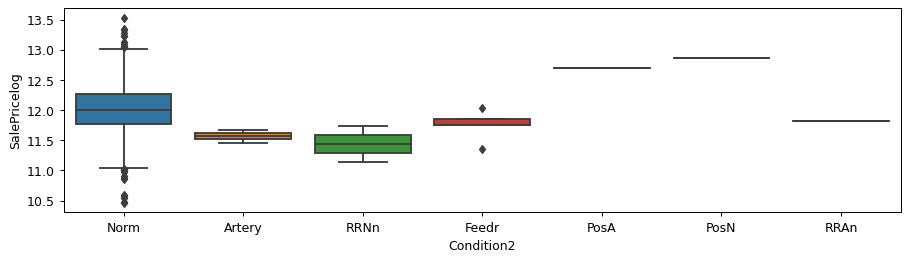



                                              BldgType                                       
1Fam      1155
TwnhsE     114
Duplex      49
Twnhs       43
2fmCon      29
Name: BldgType, dtype: int64


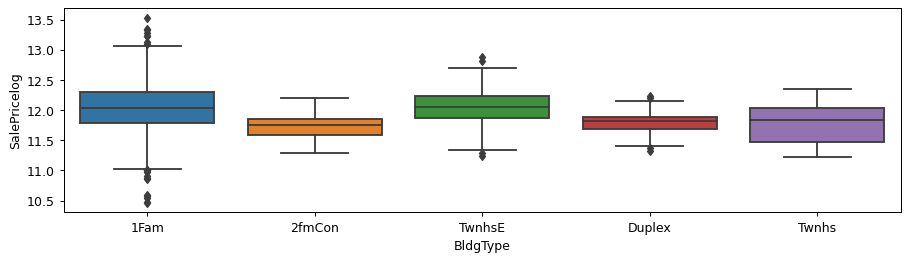



                                              HouseStyle                                       
1Story    692
2Story    427
1.5Fin    142
SLvl       61
SFoyer     35
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


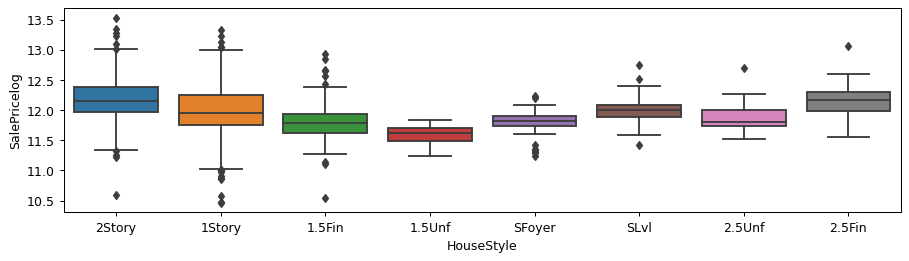



                                              RoofStyle                                       
Gable      1093
Hip         269
Gambrel      11
Flat         10
Mansard       6
Shed          1
Name: RoofStyle, dtype: int64


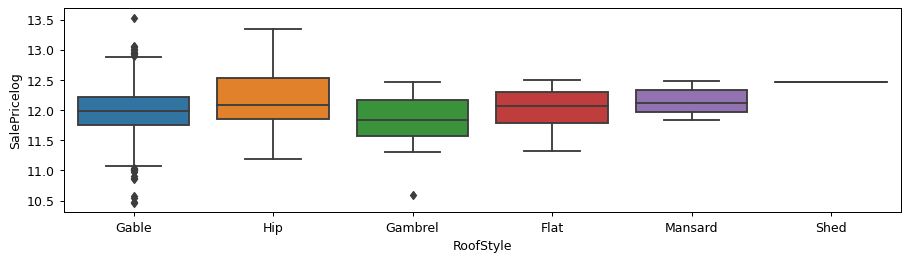



                                              RoofMatl                                       
CompShg    1370
Tar&Grv       9
WdShake       5
WdShngl       4
Metal         1
Roll          1
Name: RoofMatl, dtype: int64


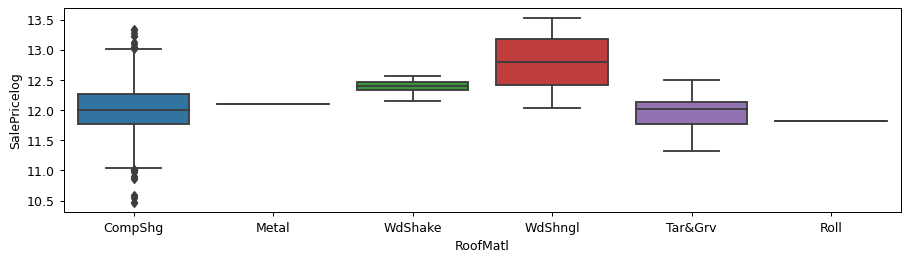



                                              Exterior1st                                       
VinylSd    505
HdBoard    209
MetalSd    208
Wd Sdng    190
Plywood     97
CemntBd     58
BrkFace     48
WdShing     25
Stucco      23
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64


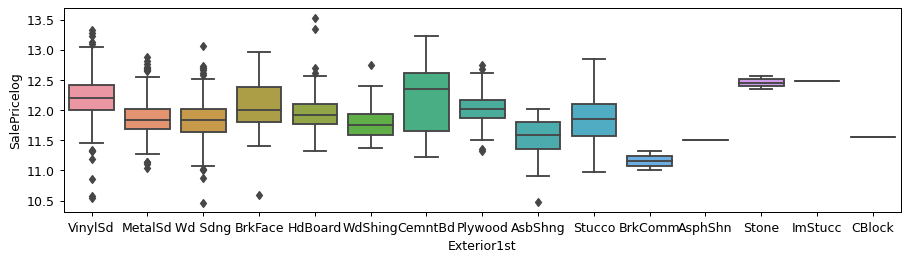



                                              Exterior2nd                                       
VinylSd    495
MetalSd    202
HdBoard    194
Wd Sdng    183
Plywood    129
CmentBd     58
Wd Shng     35
BrkFace     24
Stucco      24
AsbShng     20
ImStucc      9
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64


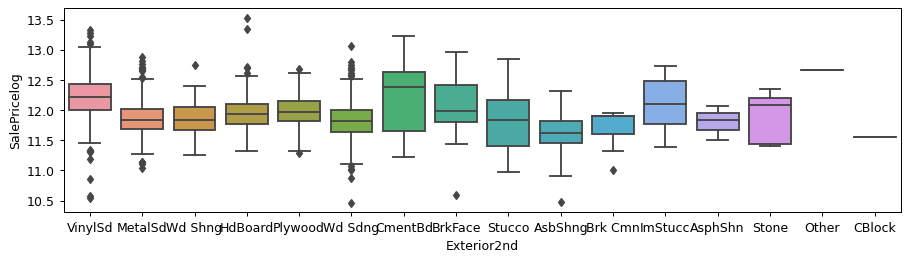



                                              MasVnrType                                       
None       822
BrkFace    431
Stone      124
BrkCmn      13
Name: MasVnrType, dtype: int64


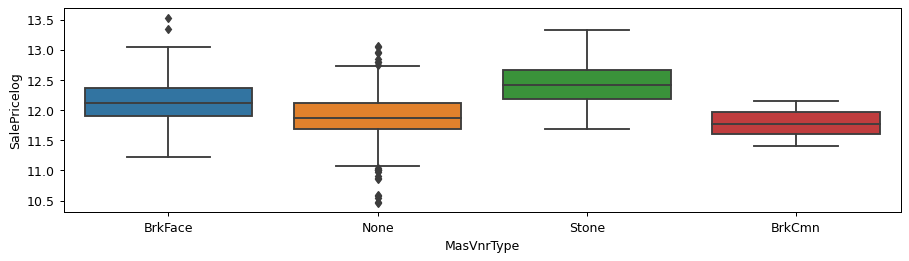



                                              ExterQual                                       
TA    857
Gd    475
Ex     47
Fa     11
Name: ExterQual, dtype: int64


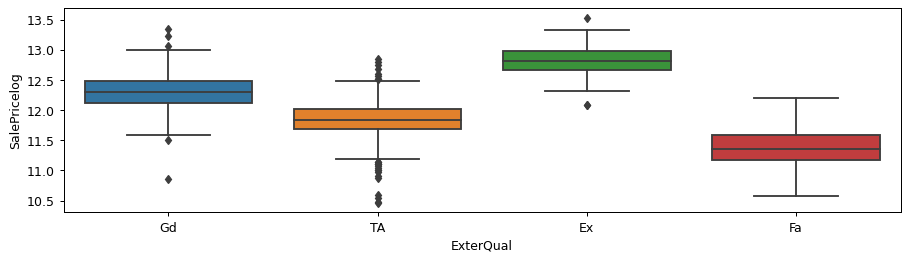



                                              ExterCond                                       
TA    1222
Gd     138
Fa      27
Ex       3
Name: ExterCond, dtype: int64


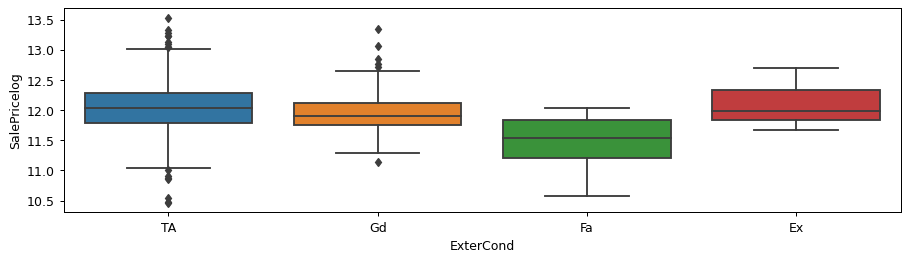



                                              Foundation                                       
PConc     632
CBlock    591
BrkTil    139
Slab       21
Stone       5
Wood        2
Name: Foundation, dtype: int64


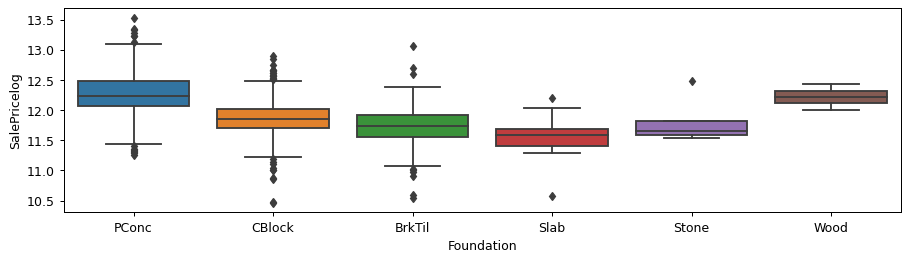



                                              BsmtQual                                       
TA    649
Gd    592
Ex    117
Fa     32
Name: BsmtQual, dtype: int64


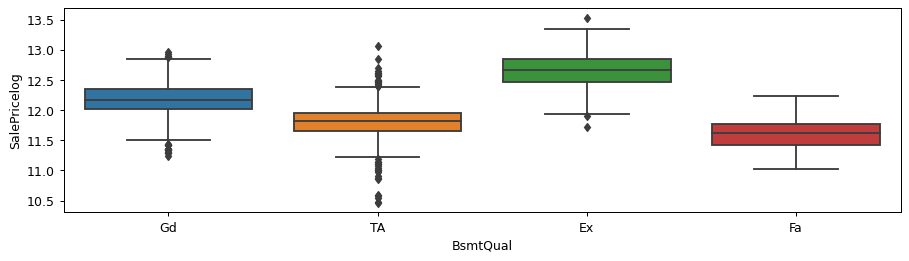



                                              BsmtCond                                       
TA    1282
Gd      62
Fa      44
Po       2
Name: BsmtCond, dtype: int64


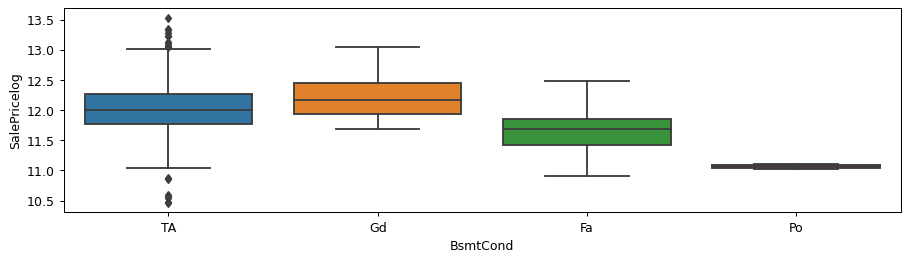



                                              BsmtExposure                                       
No    949
Av    211
Gd    122
Mn    108
Name: BsmtExposure, dtype: int64


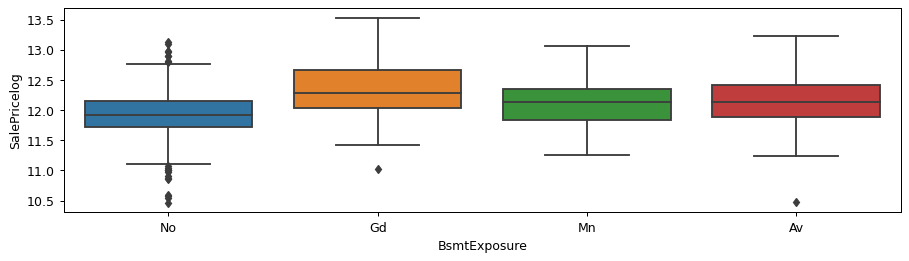



                                              BsmtFinType1                                       
Unf    450
GLQ    402
ALQ    199
BLQ    139
Rec    129
LwQ     71
Name: BsmtFinType1, dtype: int64


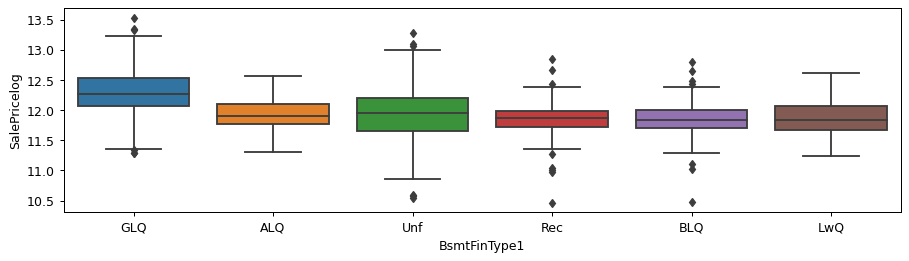



                                              BsmtFinType2                                       
Unf    1239
Rec      49
LwQ      41
BLQ      30
ALQ      19
GLQ      12
Name: BsmtFinType2, dtype: int64


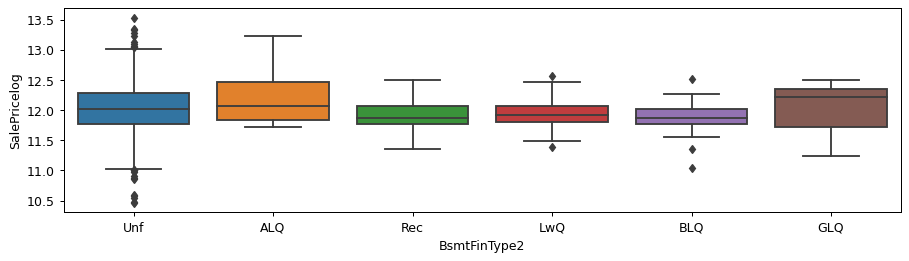



                                              Heating                                       
GasA     1360
GasW       16
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


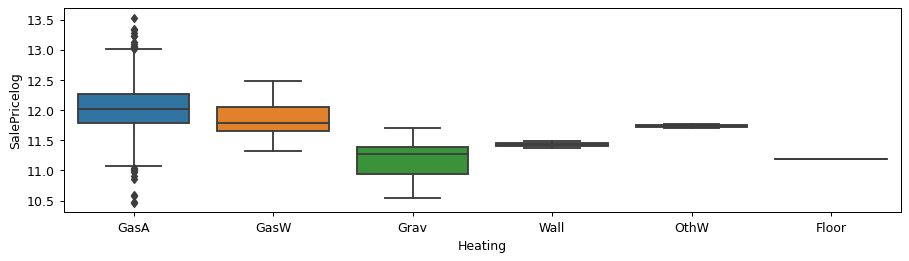



                                              HeatingQC                                       
Ex    712
TA    403
Gd    230
Fa     44
Po      1
Name: HeatingQC, dtype: int64


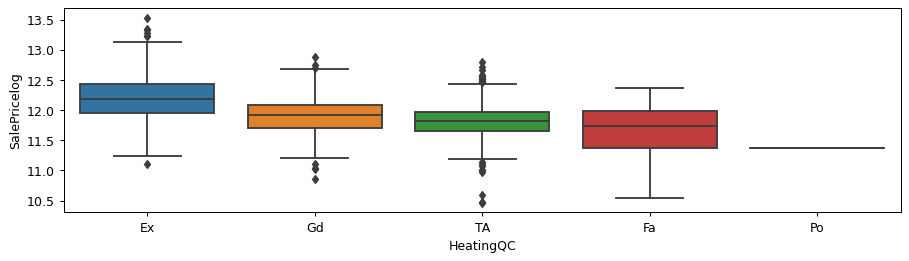



                                              CentralAir                                       
Y    1299
N      91
Name: CentralAir, dtype: int64


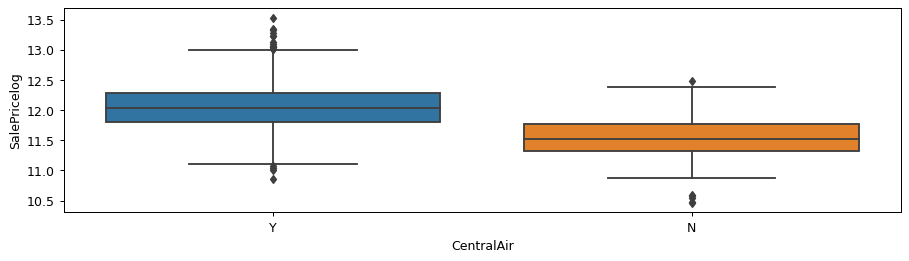



                                              Electrical                                       
SBrkr    1266
FuseA      92
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


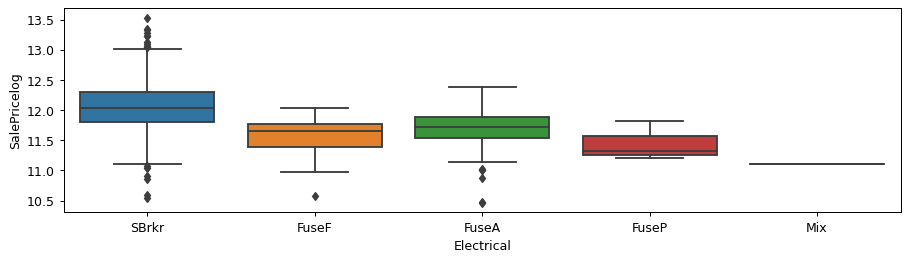



                                              KitchenQual                                       
TA    694
Gd    565
Ex     96
Fa     35
Name: KitchenQual, dtype: int64


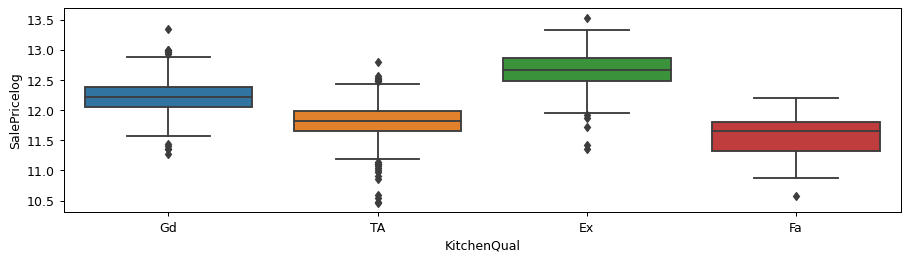



                                              Functional                                       
Typ     1304
Min2      32
Min1      25
Maj1      14
Mod        9
Maj2       5
Sev        1
Name: Functional, dtype: int64


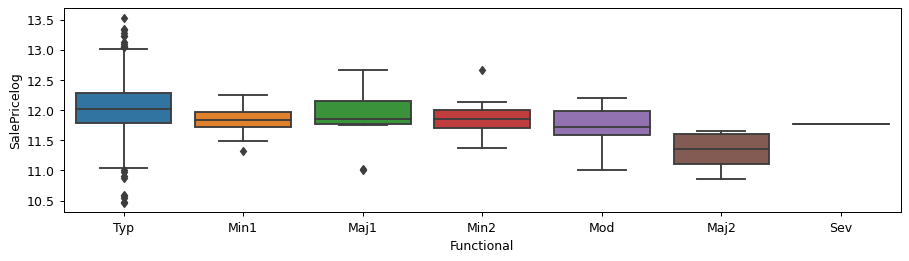



                                              GarageType                                       
Attchd     907
Detchd     370
BuiltIn     83
Basment     17
CarPort      7
2Types       6
Name: GarageType, dtype: int64


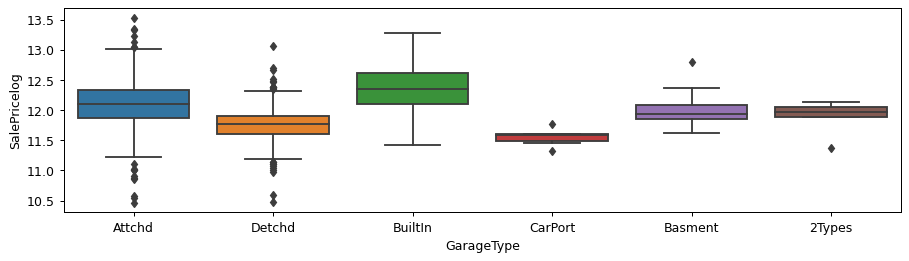



                                              GarageFinish                                       
Unf    654
RFn    400
Fin    336
Name: GarageFinish, dtype: int64


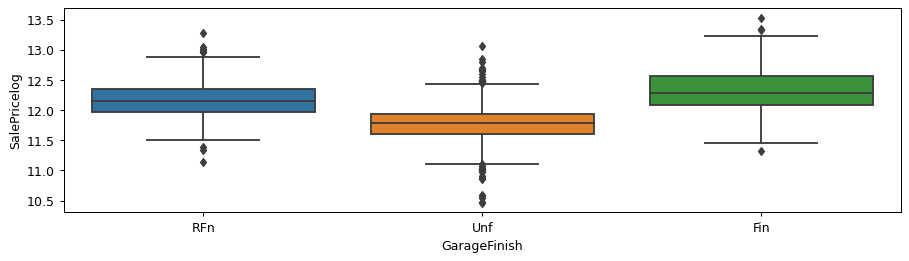



                                              GarageQual                                       
TA    1329
Fa      43
Gd      13
Po       3
Ex       2
Name: GarageQual, dtype: int64


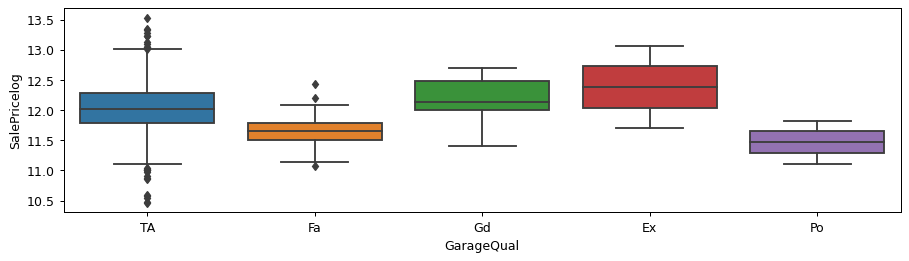



                                              GarageCond                                       
TA    1341
Fa      33
Gd       8
Po       7
Ex       1
Name: GarageCond, dtype: int64


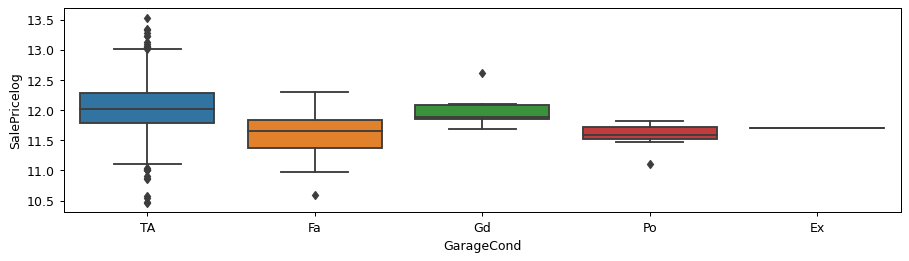



                                              PavedDrive                                       
Y    1276
N      85
P      29
Name: PavedDrive, dtype: int64


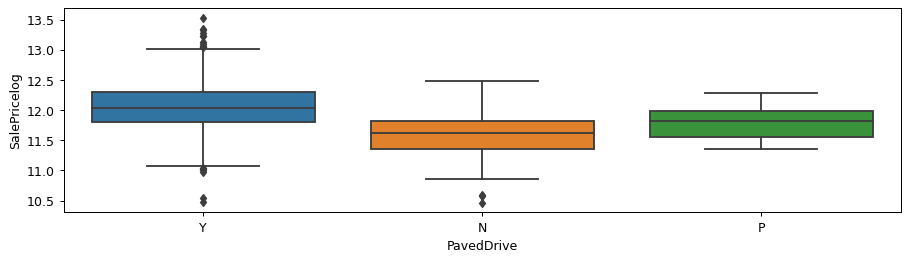



                                              SaleType                                       
WD       1203
New       120
COD        41
ConLD       8
ConLw       5
CWD         4
ConLI       4
Oth         3
Con         2
Name: SaleType, dtype: int64


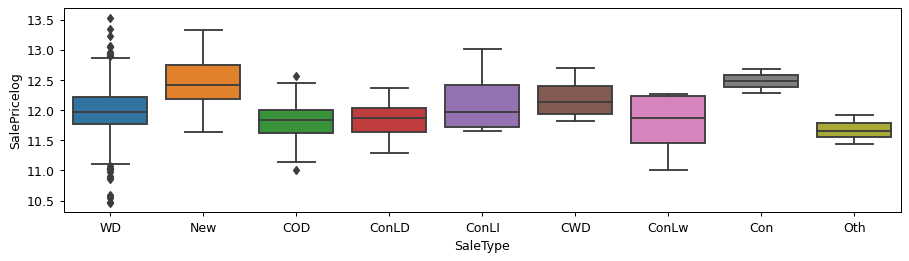



                                              SaleCondition                                       
Normal     1136
Partial     123
Abnorml      97
Family       20
Alloca       10
AdjLand       4
Name: SaleCondition, dtype: int64


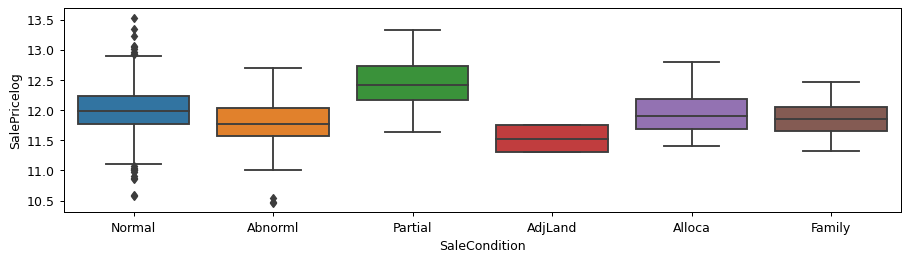

In [392]:
# Plotting the box plot for Categorical columns
categ_var = housingprice.select_dtypes(include=['object']).columns

categorical_datab(categ_var)

In [393]:
# Dropping street and utilities from the data as the data doest add value
housingprice.drop(['Street','Utilities'],axis=1,inplace=True)

In [394]:
def numerical_data(cols):
    int_range = range(len(cols))[::3]
    col_length = len(cols)
    for col in int_range:
        print('------------------ ',cols[col:col+3],' ---------------------')
        sns.pairplot(housingprice, x_vars=cols[col:col+3], y_vars='SalePricelog',height=3, aspect=1,kind='scatter')            
        plt.show()

In [395]:
# Extracting the numerical columns indexes
num_cols=housingprice.select_dtypes(include=['int64', 'float']).columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold',
       'SalePrice', 'AgeYearBuilt', 'AgeYearRemodAdd', 'AgeGarageYrBlt',
       'AgeYrSold', 'SalePricelog'],
      dtype='object')

In [396]:
num_cols = num_cols.drop(labels='SalePricelog')
num_cols
num_cols = num_cols.drop(labels='SalePrice')
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold',
       'AgeYearBuilt', 'AgeYearRemodAdd', 'AgeGarageYrBlt', 'AgeYrSold'],
      dtype='object')

------------------  Index(['MSSubClass', 'LotFrontage', 'LotArea'], dtype='object')  ---------------------


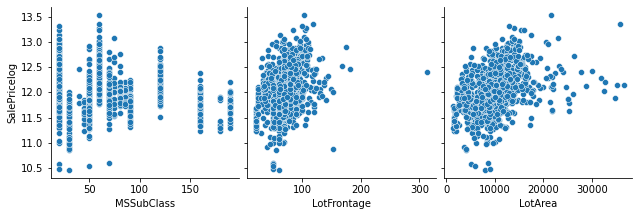

------------------  Index(['OverallQual', 'OverallCond', 'MasVnrArea'], dtype='object')  ---------------------


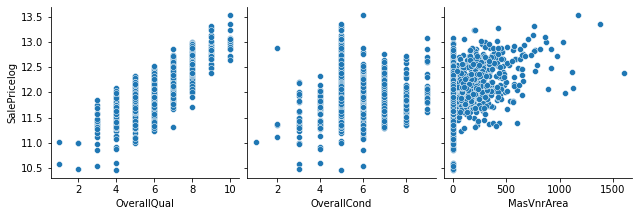

------------------  Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], dtype='object')  ---------------------


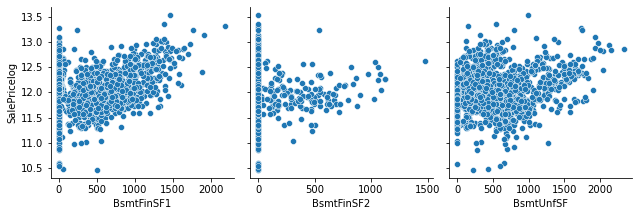

------------------  Index(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], dtype='object')  ---------------------


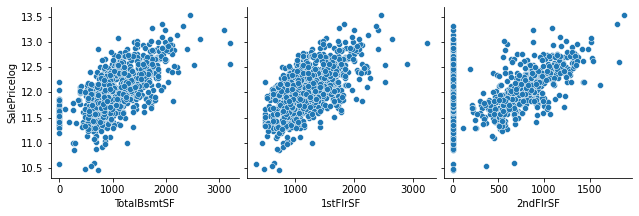

------------------  Index(['GrLivArea', 'BsmtFullBath', 'FullBath'], dtype='object')  ---------------------


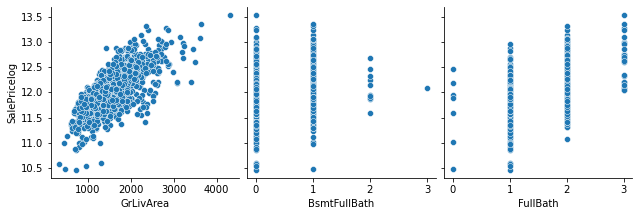

------------------  Index(['HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd'], dtype='object')  ---------------------


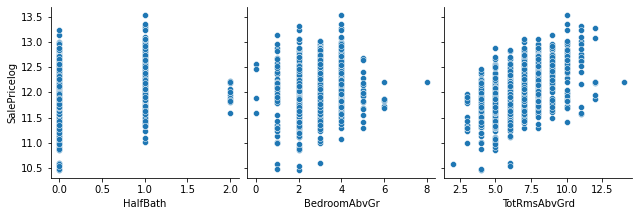

------------------  Index(['Fireplaces', 'GarageCars', 'GarageArea'], dtype='object')  ---------------------


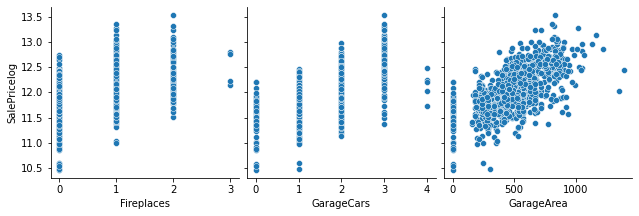

------------------  Index(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'], dtype='object')  ---------------------


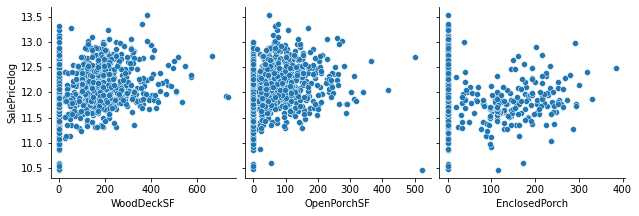

------------------  Index(['MoSold', 'AgeYearBuilt', 'AgeYearRemodAdd'], dtype='object')  ---------------------


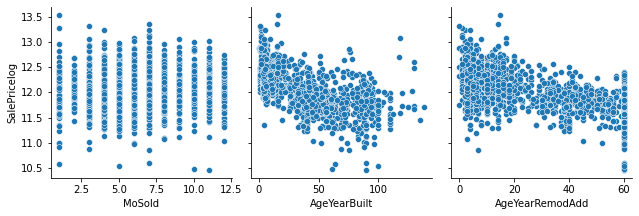

------------------  Index(['AgeGarageYrBlt', 'AgeYrSold'], dtype='object')  ---------------------


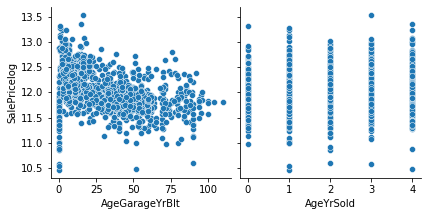

In [397]:
# Plotting the Numerical coulmns
numerical_data(num_cols)

In [399]:
# Correlation matrix
housingprice.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,AgeYearBuilt,AgeYearRemodAdd,AgeGarageYrBlt,AgeYrSold,SalePricelog
MSSubClass,1.000000,-0.388711,-0.342968,0.031077,-0.056003,0.022579,-0.075767,-0.062261,-0.144766,-0.259217,...,-0.021872,-0.009711,-0.013740,-0.017998,-0.090796,-0.022833,-0.038622,-0.095614,0.024746,-0.078139
LotFrontage,-0.388711,1.000000,0.529785,0.218463,-0.042087,0.167115,0.121164,0.034028,0.143064,0.293688,...,0.083781,0.117221,-0.015761,0.032502,0.353014,-0.118829,-0.080633,-0.034608,-0.011999,0.356879
LotArea,-0.342968,0.529785,1.000000,0.178557,-0.031430,0.159315,0.191532,0.065029,0.083374,0.314501,...,0.170396,0.143492,-0.013114,-0.017397,0.388366,-0.049302,-0.023382,0.029593,0.039214,0.386801
OverallQual,0.031077,0.218463,0.178557,1.000000,-0.095134,0.401989,0.209399,-0.067010,0.317770,0.534942,...,0.245552,0.308182,-0.130160,0.075597,0.804007,-0.574799,-0.552078,-0.432633,0.019884,0.826379
OverallCond,-0.056003,-0.042087,-0.031430,-0.095134,1.000000,-0.128382,-0.040606,0.041940,-0.142620,-0.179948,...,-0.003553,-0.038693,0.085260,0.000357,-0.083251,0.378504,-0.070152,0.291386,-0.049524,-0.043892
MasVnrArea,0.022579,0.167115,0.159315,0.401989,-0.128382,1.000000,0.235270,-0.072487,0.116509,0.342517,...,0.166599,0.106900,-0.112818,0.000805,0.492188,-0.308671,-0.169883,-0.200693,0.007854,0.437652
BsmtFinSF1,-0.075767,0.121164,0.191532,0.209399,-0.040606,0.235270,1.000000,-0.060306,-0.524818,0.450870,...,0.186892,0.073598,-0.124671,-0.002806,0.386088,-0.249066,-0.121937,-0.112889,-0.016740,0.372764
BsmtFinSF2,-0.062261,0.034028,0.065029,-0.067010,0.041940,-0.072487,-0.060306,1.000000,-0.203792,0.104622,...,0.078956,0.007503,0.037454,-0.010589,-0.026123,0.049825,0.072670,0.090724,-0.035074,-0.010134
BsmtUnfSF,-0.144766,0.143064,0.083374,0.317770,-0.142620,0.116509,-0.524818,-0.203792,1.000000,0.454228,...,0.010003,0.127139,0.006045,0.033874,0.234136,-0.152745,-0.181831,-0.171708,0.033998,0.235706
TotalBsmtSF,-0.259217,0.293688,0.314501,0.534942,-0.179948,0.342517,0.450870,0.104622,0.454228,1.000000,...,0.235874,0.216723,-0.108711,0.029540,0.644387,-0.404762,-0.295006,-0.267671,0.005688,0.638410


## Correlations on a heatmap for better visualisation¶

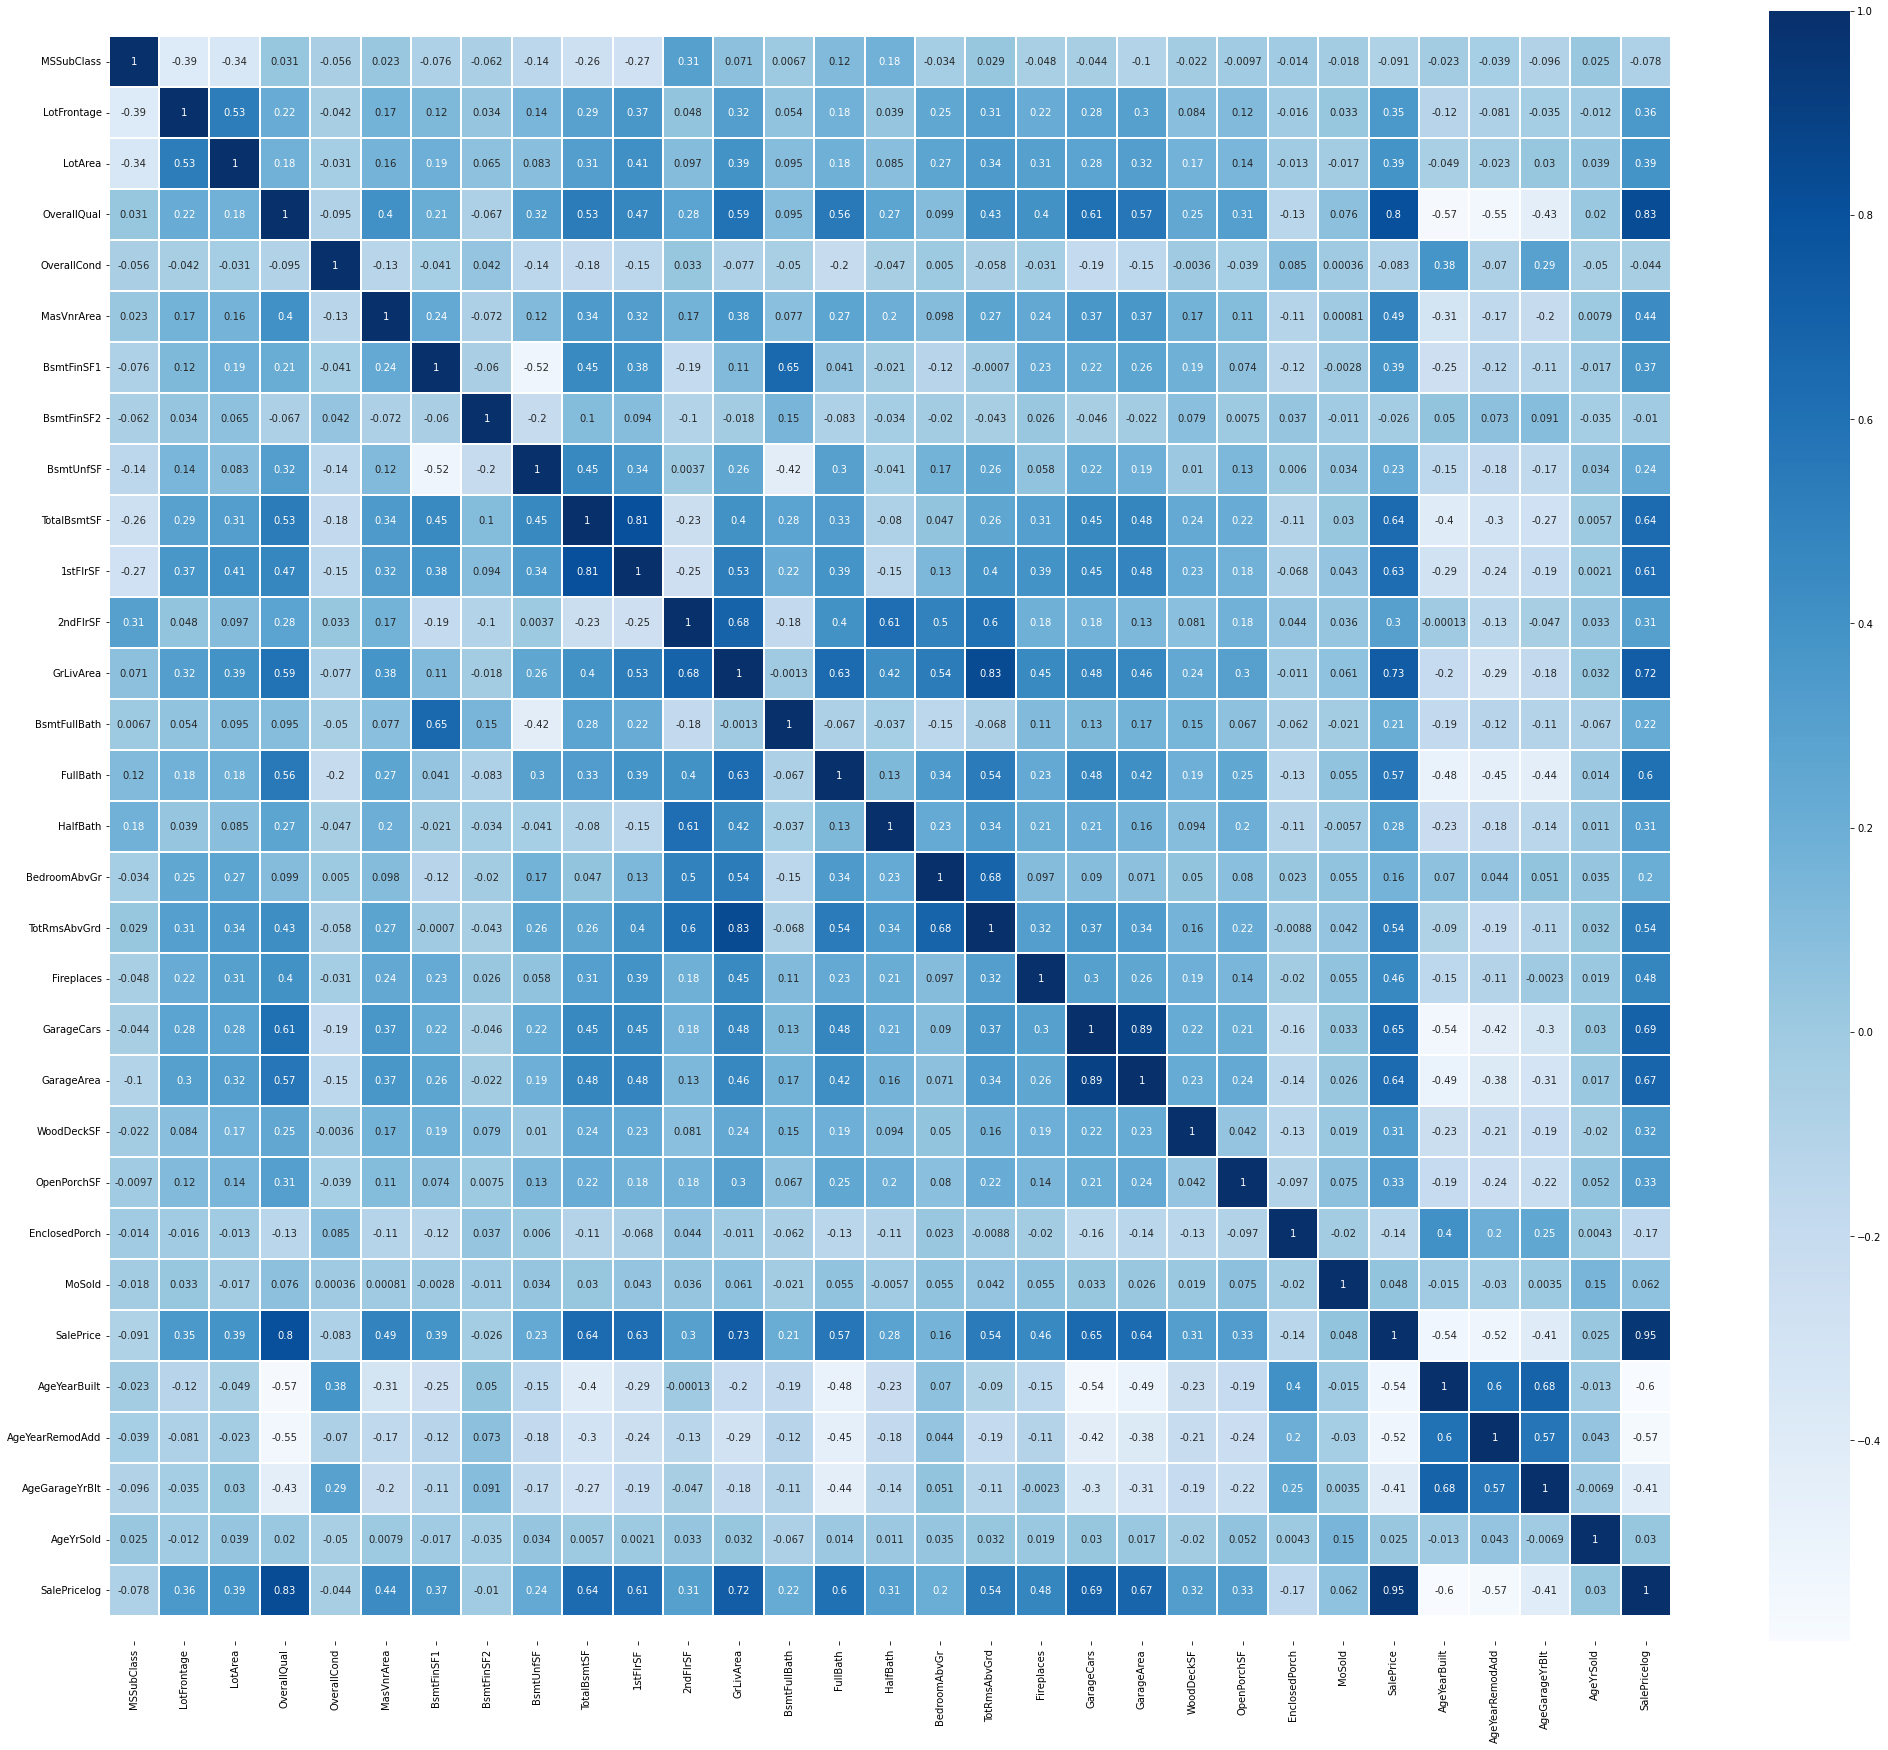

In [351]:
# heatmap
fig, ax = plt.subplots() 
fig.set_size_inches(35, 30) 
sns.heatmap(housingprice.corr(),cmap ="Blues",linewidths = 0.1, annot = True)
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.show()

In [400]:
# Data Preparation
X=housingprice.drop(columns=['SalePrice'])
y=np.log(housingprice['SalePrice'])

In [401]:
categorical_data = X.select_dtypes(include=['object'])
categorical_data.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [402]:
# Dummy Variables
dummies = pd.get_dummies(categorical_data, drop_first=True)
dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [403]:
X=X.drop(columns=categorical_data)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,AgeYearBuilt,AgeYearRemodAdd,AgeGarageYrBlt,AgeYrSold,SalePricelog
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,548,0,61,0,2,7,7,7.0,2,12.247694
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,460,298,0,0,5,34,34,34.0,3,12.109011
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,608,0,42,0,9,9,8,9.0,2,12.317167
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,642,0,35,272,2,95,40,12.0,4,11.849398
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,836,192,84,0,12,10,10,10.0,2,12.429216


In [404]:
X=pd.concat([X,dummies],axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [405]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [406]:
print(X_train.shape)
print(X_test.shape)

(972, 220)
(417, 220)


In [407]:
num_col=X_train.select_dtypes(include=['int64','float64']).columns
num_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold',
       'AgeYearBuilt', 'AgeYearRemodAdd', 'AgeGarageYrBlt', 'AgeYrSold',
       'SalePricelog'],
      dtype='object')

In [408]:
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

In [409]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
167,0.063424,0.782449,0.205331,1.407846,-0.515244,1.072033,2.026333,-0.302777,-0.621782,1.326713,...,0,0,1,0,0,0,0,0,0,1
644,-0.879563,0.735215,-0.119696,2.149541,-0.515244,0.310899,1.632074,-0.302777,0.163669,1.788348,...,0,0,1,0,0,0,0,0,0,1
1288,1.477904,-1.390314,-0.952472,1.407846,-0.515244,-0.582607,1.719425,-0.302777,-0.512132,1.123493,...,0,0,0,0,1,0,0,0,1,0
937,0.063424,0.262875,-0.004341,0.666152,-0.515244,-0.582607,-0.209378,-0.302777,0.447863,0.150045,...,0,0,0,0,1,0,0,0,1,0
348,2.420891,-1.579250,-1.712679,0.666152,-0.515244,0.002033,0.338335,-0.302777,-0.852270,-0.725556,...,0,0,0,0,1,0,0,0,1,0


# RFE(Recursive feature elimination)

In [411]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select =25)
rfe = rfe.fit(X_train, y_train)

In [412]:
rfe_housingprice = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
rfe_housingprice = rfe_housingprice.loc[rfe_housingprice['rfe_support'] == True]
rfe_housingprice.reset_index(drop=True, inplace=True)
rfe_housingprice

,Variable,rfe_support,rfe_ranking
0,BsmtFinSF1,True,1
1,BsmtFinSF2,True,1
2,BsmtUnfSF,True,1
3,TotalBsmtSF,True,1
4,SalePricelog,True,1
5,MSZoning_FV,True,1
6,Neighborhood_Mitchel,True,1
7,Condition1_RRAe,True,1
8,BldgType_Twnhs,True,1
9,HouseStyle_2.5Fin,True,1


In [413]:
col = X_train.columns[rfe.support_]
col

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'SalePricelog',
       'MSZoning_FV', 'Neighborhood_Mitchel', 'Condition1_RRAe',
       'BldgType_Twnhs', 'HouseStyle_2.5Fin', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'RoofMatl_Metal', 'RoofMatl_Tar&Grv',
       'Exterior1st_WdShing', 'Exterior2nd_Other', 'Heating_GasA',
       'Heating_OthW', 'Heating_Wall', 'KitchenQual_Fa', 'GarageCond_Fa',
       'GarageCond_Gd'],
      dtype='object')

In [414]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePricelog,MSZoning_FV,Neighborhood_Mitchel,Condition1_RRAe,BldgType_Twnhs,HouseStyle_2.5Fin,...,RoofMatl_Metal,RoofMatl_Tar&Grv,Exterior1st_WdShing,Exterior2nd_Other,Heating_GasA,Heating_OthW,Heating_Wall,KitchenQual_Fa,GarageCond_Fa,GarageCond_Gd
167,2.026333,-0.302777,-0.621782,1.326713,1.744540,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
644,1.632074,-0.302777,0.163669,1.788348,2.079418,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1288,1.719425,-0.302777,-0.512132,1.123493,1.337625,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
937,-0.209378,-0.302777,0.447863,0.150045,1.095128,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
348,0.338335,-0.302777,-0.852270,-0.725556,-0.182410,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


# Ridge & Lasso Regression

In [415]:
#Alphas to  tune the model
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [416]:
ridge = Ridge()

In [417]:
# Cross Validation 
folds = 5
RidgeModelCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)           
RidgeModelCV.fit(X_train, y_train) 

Fitting 5 folds for each of 39 candidates, totalling 195 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
                                   0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [418]:
print(RidgeModelCV.best_params_)
print(RidgeModelCV.best_score_)

{'alpha': 0.0001}
-2.3742476491415558e-07


In [419]:
RidgeModelCVResults = pd.DataFrame(RidgeModelCV.cv_results_)
RidgeCVResults = RidgeModelCVResults[RidgeModelCVResults['param_alpha']<=200]
RidgeCVResults[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-1.570454e-07,-2.374248e-07,1
1,0.0002,-3.140766e-07,-4.748065e-07,2
2,0.0003,-4.710939e-07,-7.121450e-07,3
3,0.0004,-6.280971e-07,-9.494405e-07,4
4,0.0005,-7.850863e-07,-1.186693e-06,5
5,0.001,-1.569825e-06,-2.372314e-06,6
6,0.002,-3.138280e-06,-4.740374e-06,7
7,0.003,-4.705429e-06,-7.104250e-06,8
8,0.004,-6.271290e-06,-9.464012e-06,9
9,0.005,-7.835866e-06,-1.182009e-05,10


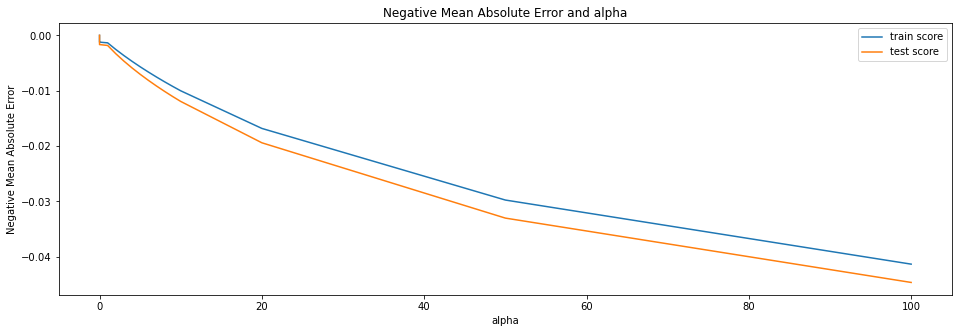

In [420]:
RidgeCVResults['param_alpha'] = RidgeCVResults['param_alpha'].astype('int32')
# plotting mean for train and test score with alpha 
RidgeCVResults['param_alpha'] = RidgeCVResults['param_alpha']
plt.figure(figsize=(16,5))
plt.plot(RidgeCVResults['param_alpha'], RidgeCVResults['mean_train_score'])
plt.plot(RidgeCVResults['param_alpha'], RidgeCVResults['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [421]:
RidgeModelCV.best_estimator_

Ridge(alpha=0.0001)

In [422]:
print(int(RidgeModelCV.best_params_.get('alpha')))

0


In [423]:
alpha = int(RidgeModelCV.best_params_.get('alpha'))
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.54390389e-16,  2.09901541e-16, -2.87964097e-16, -8.58688121e-17,
       -8.32667268e-17, -1.04083409e-17,  2.76603466e-02,  1.11387990e-02,
        2.91817797e-02, -2.60280941e-02, -3.81639165e-17, -9.36750677e-17,
       -3.12250226e-17, -2.49800181e-16, -1.21430643e-16,  1.04083409e-16,
       -2.86229374e-16,  1.35308431e-16, -1.24900090e-16, -2.52402266e-16,
       -2.28983499e-16, -7.63820431e-17,  2.68882139e-17,  1.04083409e-17,
        2.51534904e-17,  1.61329283e-16, -1.52655666e-16, -2.91433544e-16,
       -6.24500451e-17,  3.88588585e-01,  1.62196645e-15,  2.79984369e-15,
        2.52922683e-15,  2.15105711e-15,  1.45716772e-16, -1.35308431e-16,
       -1.07552856e-16,  8.84708973e-17,  3.69062420e-16, -6.93889390e-18,
       -3.29597460e-16, -5.20417043e-17,  1.07542013e-15, -1.04083409e-16,
        1.07986536e-16, -1.43244791e-15,  9.43693012e-01,  7.89299182e-16,
        6.21031004e-16, -2.74953671e-16, -1.95156391e-16, -1.75640752e-16,
       -3.46944695e-18,  

In [424]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

1.0


In [425]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9200428861423889


In [426]:
# RMSE
metrics.mean_squared_error(y_test, ridge.predict(X_test))

0.013448783233303658

In [427]:
alpha = int(RidgeModelCV.best_params_.get('alpha'))*2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.54390389e-16,  2.09901541e-16, -2.87964097e-16, -8.58688121e-17,
       -8.32667268e-17, -1.04083409e-17,  2.76603466e-02,  1.11387990e-02,
        2.91817797e-02, -2.60280941e-02, -3.81639165e-17, -9.36750677e-17,
       -3.12250226e-17, -2.49800181e-16, -1.21430643e-16,  1.04083409e-16,
       -2.86229374e-16,  1.35308431e-16, -1.24900090e-16, -2.52402266e-16,
       -2.28983499e-16, -7.63820431e-17,  2.68882139e-17,  1.04083409e-17,
        2.51534904e-17,  1.61329283e-16, -1.52655666e-16, -2.91433544e-16,
       -6.24500451e-17,  3.88588585e-01,  1.62196645e-15,  2.79984369e-15,
        2.52922683e-15,  2.15105711e-15,  1.45716772e-16, -1.35308431e-16,
       -1.07552856e-16,  8.84708973e-17,  3.69062420e-16, -6.93889390e-18,
       -3.29597460e-16, -5.20417043e-17,  1.07542013e-15, -1.04083409e-16,
        1.07986536e-16, -1.43244791e-15,  9.43693012e-01,  7.89299182e-16,
        6.21031004e-16, -2.74953671e-16, -1.95156391e-16, -1.75640752e-16,
       -3.46944695e-18,  

In [428]:
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

1.0


In [429]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9200428861423889


In [430]:
metrics.mean_squared_error(y_test, ridge.predict(X_test))

0.013448783233303658

In [431]:
ridge_housingprice = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_housingprice.reset_index(drop=True, inplace=True)
ridge_housingprice

,Features,Coefficient
0,MSSubClass,-0.0
1,LotFrontage,0.0
2,LotArea,-0.0
3,OverallQual,-0.0
4,OverallCond,-0.0
...,...,...
215,SaleCondition_AdjLand,0.0
216,SaleCondition_Alloca,-0.0
217,SaleCondition_Family,-0.0
218,SaleCondition_Normal,-0.0


In [432]:
ridge_coeff = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))

In [433]:
# minimise the feature using RFE
X_train_ridge = X_train[ridge_housingprice.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

rfe = RFE(lm, n_features_to_select =15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [434]:
ridge_housingprice1 = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
ridge_housingprice1 = ridge_housingprice1.loc[ridge_housingprice1['rfe_support'] == True]
ridge_housingprice1.reset_index(drop=True, inplace=True)

ridge_housingprice1['Coefficient'] = ridge_housingprice1['Features'].apply(lambda x: ridge_coeff[x])
ridge_housingprice1 = ridge_housingprice1.sort_values(by=['Coefficient'], ascending=False)
ridge_housingprice1 = ridge_housingprice1.head(10)
ridge_housingprice1

,Features,rfe_support,rfe_ranking,Coefficient
14,Heating_Wall,True,1,0.6384
4,SalePricelog,True,1,0.3886
2,BsmtUnfSF,True,1,0.0292
0,BsmtFinSF1,True,1,0.0277
1,BsmtFinSF2,True,1,0.0111
5,MSZoning_FV,True,1,0.0000
6,BldgType_Twnhs,True,1,0.0000
3,TotalBsmtSF,True,1,-0.0260
7,RoofStyle_Gable,True,1,-0.1112
8,RoofStyle_Gambrel,True,1,-0.1112


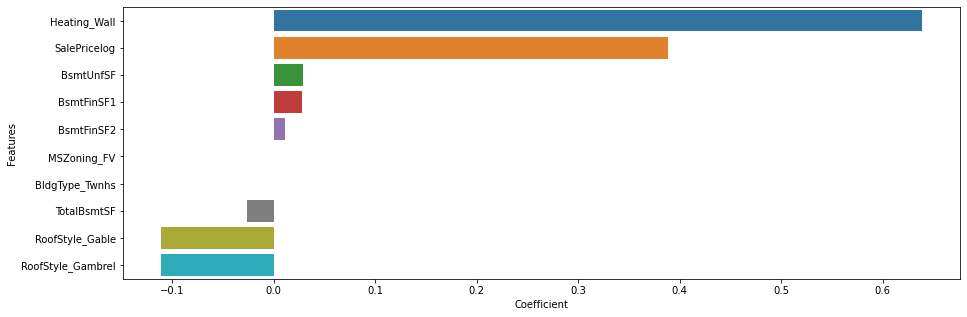

In [435]:
plt.figure(figsize=(15,5))
sns.barplot(y = 'Features', x='Coefficient', data = ridge_housingprice1)
plt.show()

In [436]:
lasso = Lasso()

In [437]:
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

In [438]:
folds = 5
LassoModelCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)             

LassoModelCV.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [439]:
print(LassoModelCV.best_params_)
print(LassoModelCV.best_score_)

{'alpha': 0.0001}
-7.780684308563847e-05


In [440]:
LassoModelCVResults = pd.DataFrame(LassoModelCV.cv_results_)
LassoModelCVResults[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.000078,-0.000078,1
1,0.0002,-0.000155,-0.000156,2
2,0.0003,-0.000233,-0.000233,3
3,0.0004,-0.000310,-0.000311,4
4,0.0005,-0.000388,-0.000389,5
5,0.001,-0.000775,-0.000778,6
6,0.002,-0.001551,-0.001556,7
7,0.003,-0.002326,-0.002334,8
8,0.004,-0.003101,-0.003112,9
9,0.005,-0.003877,-0.003890,10


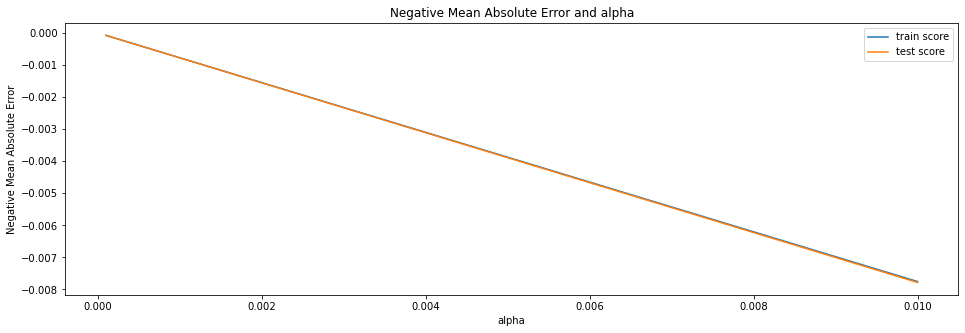

In [441]:
LassoModelCVResults['param_alpha'] = LassoModelCVResults['param_alpha'].astype('float32')

# plotting mean for train and test score with alpha 

plt.figure(figsize=(16,5))
plt.plot(LassoModelCVResults['param_alpha'], LassoModelCVResults['mean_train_score'])
plt.plot(LassoModelCVResults['param_alpha'], LassoModelCVResults['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [442]:
LassoModelCV.best_params_.get('alpha')

0.0001

In [443]:
alpha = LassoModelCV.best_params_.get('alpha')
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.38848858,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [444]:
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9999999337753117


In [445]:
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9999999335046362


In [446]:
# RMSE
metrics.mean_squared_error(y_test, lasso.predict(X_test))

1.1184517425353694e-08

In [447]:
alpha = LassoModelCV.best_params_.get('alpha')*2
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.38838858,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [448]:
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9999997351012468


In [449]:
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9999997340185449


In [450]:
metrics.mean_squared_error(y_test, lasso.predict(X_test))

4.473806970136382e-08

In [451]:
lasso_housingprice = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_housingprice.reset_index(drop=True, inplace=True)
lasso_housingprice

,Features,Coefficient
0,MSSubClass,-0.0
1,LotFrontage,0.0
2,LotArea,0.0
3,OverallQual,0.0
4,OverallCond,-0.0
...,...,...
215,SaleCondition_AdjLand,-0.0
216,SaleCondition_Alloca,0.0
217,SaleCondition_Family,-0.0
218,SaleCondition_Normal,-0.0


In [452]:
lasso_coeff = dict(pd.Series(lasso.coef_.round(4), index = X_train.columns))

In [453]:
X_train_lasso = X_train[lasso_housingprice.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

rfe = RFE(lm, n_features_to_select =15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [454]:
lasso_housingprice = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
lasso_housingprice = lasso_housingprice.loc[lasso_housingprice['rfe_support'] == True]
lasso_housingprice.reset_index(drop=True, inplace=True)

lasso_housingprice['Coefficient'] = lasso_housingprice['Features'].apply(lambda x: lasso_coeff[x])
lasso_housingprice = lasso_housingprice.sort_values(by=['Coefficient'], ascending=False)
lasso_housingprice = lasso_housingprice.head(10)
lasso_housingprice

,Features,rfe_support,rfe_ranking,Coefficient
4,SalePricelog,True,1,0.3884
0,BsmtFinSF1,True,1,0.0000
1,BsmtFinSF2,True,1,-0.0000
2,BsmtUnfSF,True,1,0.0000
3,TotalBsmtSF,True,1,0.0000
5,MSZoning_FV,True,1,0.0000
6,BldgType_Twnhs,True,1,-0.0000
7,RoofStyle_Gable,True,1,-0.0000
8,RoofStyle_Gambrel,True,1,-0.0000
9,RoofStyle_Hip,True,1,0.0000


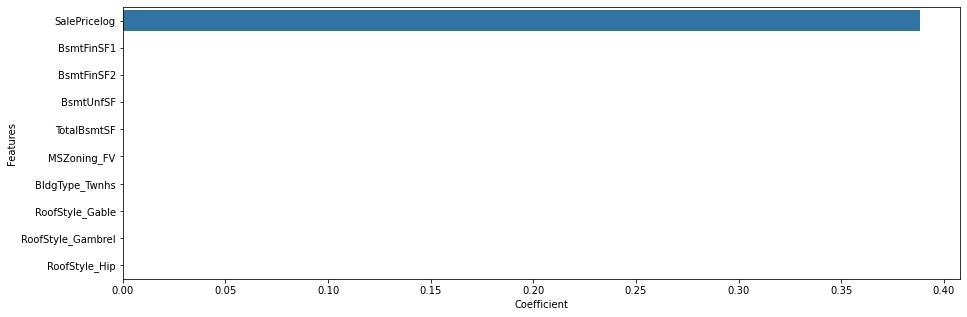

In [455]:
plt.figure(figsize=(15,5))
sns.barplot(y = 'Features', x='Coefficient', data = lasso_housingprice)
plt.show()